In [1]:
# Import necessary libraries
import pandas as pd
from textblob import TextBlob

# Load the dataset
file_path = 'synthetic_feedback_data.csv'
data = pd.read_csv(file_path)

# Function to analyze sentiment polarity (-1 to 1 scale)
def get_sentiment(feedback):
    blob = TextBlob(feedback)
    return blob.sentiment.polarity

# Apply sentiment analysis to the feedback_text column
data['sentiment_score'] = data['feedback_text'].apply(get_sentiment)

# Function to classify the sentiment score
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Classify the sentiment score
data['sentiment_label'] = data['sentiment_score'].apply(classify_sentiment)

# Cognitive Trend Analysis
# Analyzing cognitive trends based on menu items and sentiment
menu_trend = data.groupby(['menu_item', 'sentiment_label']).size().unstack(fill_value=0)

# Analyzing cognitive trends based on meal time and sentiment
meal_time_trend = data.groupby(['meal_time', 'sentiment_label']).size().unstack(fill_value=0)

# Display results
print("Sentiment Analysis:")
print(data[['feedback_text', 'sentiment_score', 'sentiment_label']].head())

print("\nCognitive Trend Analysis - Menu Items:")
print(menu_trend)

print("\nCognitive Trend Analysis - Meal Times:")
print(meal_time_trend)

# Optionally, save the trend results to CSV
menu_trend.to_csv('menu_trend_analysis.csv')
meal_time_trend.to_csv('meal_time_trend_analysis.csv')


Sentiment Analysis:
                                  feedback_text  sentiment_score  \
0  I appreciated the healthy options available.         0.366667   
1                The preparation was well done.         0.000000   
2                The preparation was well done.         0.000000   
3        I didn’t like the texture of the meal.         0.000000   
4         The staff was attentive and friendly.         0.387500   

  sentiment_label  
0        Positive  
1         Neutral  
2         Neutral  
3         Neutral  
4        Positive  

Cognitive Trend Analysis - Menu Items:
sentiment_label       Negative  Neutral  Positive
menu_item                                        
Caesar Salad                15       20        55
Chicken                     10       22        60
Chicken Biryani              7       12        56
Chole Bhature                7       19        59
Egg Curry                   19       26        54
Fish Curry                   9       18        57
Fried Rice 


Sentiment Summary:
sentiment_label
Positive    1950
Neutral      678
Negative     372
Name: count, dtype: int64


C:\Users\Sarveswar Raj\AppData\Local\Temp\ipykernel_7396\693037719.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_summary.index, y=sentiment_summary.values, palette='viridis')


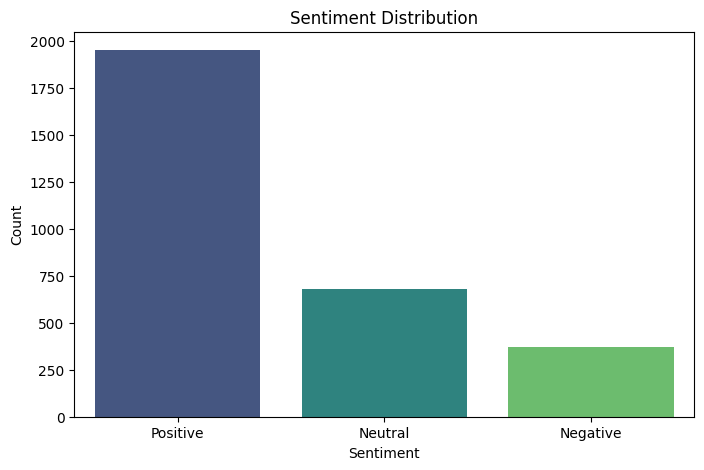

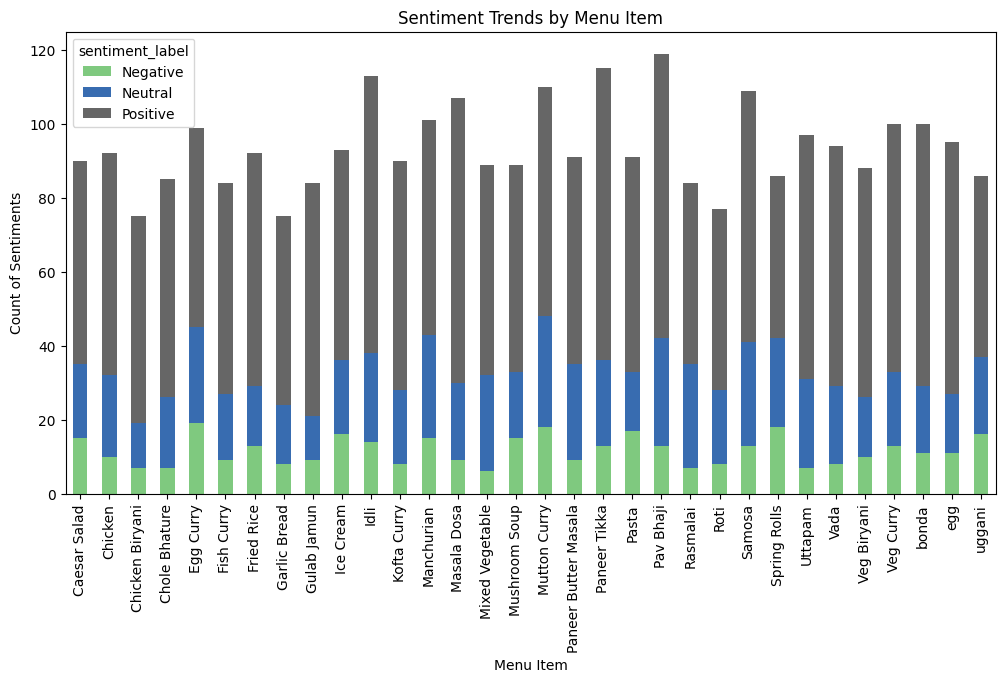

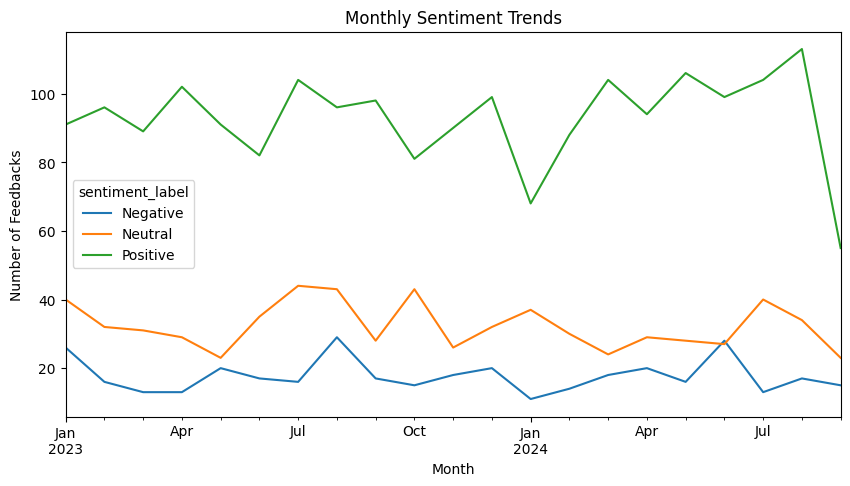


Top Positive Menu Items:
menu_item
Paneer Tikka    79
Masala Dosa     77
Pav Bhaji       77
Idli            75
bonda           71
Name: Positive, dtype: int64

Top Negative Menu Items:
menu_item
Egg Curry       19
Mutton Curry    18
Spring Rolls    18
Pasta           17
Ice Cream       16
Name: Negative, dtype: int64


In [2]:
# Import necessary libraries
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'synthetic_feedback_data.csv'
data = pd.read_csv(file_path)

# Basic Preprocessing: Cleaning the text (convert to lowercase, remove punctuation)
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    return ''.join([char for char in text if char.isalnum() or char.isspace()])  # Remove punctuation

# Apply text cleaning to feedback column
data['cleaned_feedback'] = data['feedback_text'].apply(clean_text)

# Function to analyze sentiment polarity (-1 to 1 scale)
def get_sentiment(feedback):
    blob = TextBlob(feedback)
    return blob.sentiment.polarity

# Apply sentiment analysis to the cleaned feedback text
data['sentiment_score'] = data['cleaned_feedback'].apply(get_sentiment)

# Function to classify the sentiment score
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Classify the sentiment score
data['sentiment_label'] = data['sentiment_score'].apply(classify_sentiment)

# Sentiment Summary: Count the total positive, neutral, and negative reviews
sentiment_summary = data['sentiment_label'].value_counts()
print("\nSentiment Summary:")
print(sentiment_summary)

# Cognitive Trend Analysis
# 1. Analyzing cognitive trends based on menu items and sentiment
menu_trend = data.groupby(['menu_item', 'sentiment_label']).size().unstack(fill_value=0)

# 2. Analyzing cognitive trends based on meal time and sentiment
meal_time_trend = data.groupby(['meal_time', 'sentiment_label']).size().unstack(fill_value=0)

# 3. Analyzing trends over time (by month or other time intervals)
data['feedback_timestamp'] = pd.to_datetime(data['feedback_timestamp'])
data['month'] = data['feedback_timestamp'].dt.to_period('M')  # Monthly analysis
monthly_trend = data.groupby(['month', 'sentiment_label']).size().unstack(fill_value=0)

# Visualization: Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_summary.index, y=sentiment_summary.values, palette='viridis')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Visualization: Menu Item Sentiment Trends
menu_trend.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Accent')
plt.title("Sentiment Trends by Menu Item")
plt.xlabel("Menu Item")
plt.ylabel("Count of Sentiments")
plt.show()

# Visualization: Sentiment Trends Over Time (Monthly)
monthly_trend.plot(kind='line', figsize=(10, 5))
plt.title("Monthly Sentiment Trends")
plt.xlabel("Month")
plt.ylabel("Number of Feedbacks")
plt.show()

# Finding top positive and negative menu items based on sentiment
top_positive_menu = menu_trend['Positive'].sort_values(ascending=False).head(5)
top_negative_menu = menu_trend['Negative'].sort_values(ascending=False).head(5)

print("\nTop Positive Menu Items:")
print(top_positive_menu)

print("\nTop Negative Menu Items:")
print(top_negative_menu)

# Save trend results to CSV
menu_trend.to_csv('menu_trend_analysis.csv')
meal_time_trend.to_csv('meal_time_trend_analysis.csv')
monthly_trend.to_csv('monthly_sentiment_trend.csv')


In [4]:
import pandas as pd
from textblob import TextBlob

# Load the dataset
file_path = 'synthetic_feedback_data.csv'
data = pd.read_csv(file_path)

# Function to analyze sentiment polarity (-1 to 1 scale)
def get_sentiment(feedback):
    blob = TextBlob(feedback)
    return blob.sentiment.polarity

# Apply sentiment analysis to the feedback_text column
data['sentiment_score'] = data['feedback_text'].apply(get_sentiment)

# Function to classify the sentiment score
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Classify the sentiment score
data['sentiment_label'] = data['sentiment_score'].apply(classify_sentiment)


In [5]:
# Ensure 'feedback_timestamp' is in datetime format
data['feedback_timestamp'] = pd.to_datetime(data['feedback_timestamp'])

# Extract month and year
data['year_month'] = data['feedback_timestamp'].dt.to_period('M')

# Group by month and menu item, calculating the average sentiment score
monthly_menu_analysis = data.groupby(['year_month', 'menu_item']).agg(
    average_sentiment_score=('sentiment_score', 'mean'),
    positive_count=('sentiment_label', lambda x: (x == 'Positive').sum()),
    negative_count=('sentiment_label', lambda x: (x == 'Negative').sum()),
    neutral_count=('sentiment_label', lambda x: (x == 'Neutral').sum())
).reset_index()

# Display the results
print("Monthly Menu Analysis:")
print(monthly_menu_analysis)

# Optionally, save the results to a CSV file
monthly_menu_analysis.to_csv('monthly_menu_analysis.csv', index=False)


Monthly Menu Analysis:
    year_month        menu_item  average_sentiment_score  positive_count  \
0      2023-01     Caesar Salad                 0.306548               5   
1      2023-01          Chicken                 0.255556               4   
2      2023-01  Chicken Biryani                 0.500000               1   
3      2023-01    Chole Bhature                 0.166667               1   
4      2023-01        Egg Curry                 0.036667               1   
..         ...              ...                      ...             ...   
661    2024-09      Veg Biryani                 0.635714               6   
662    2024-09        Veg Curry                 0.383333               2   
663    2024-09            bonda                 0.140000               2   
664    2024-09              egg                 1.000000               1   
665    2024-09           uggani                 0.261905               2   

     negative_count  neutral_count  
0                 2        

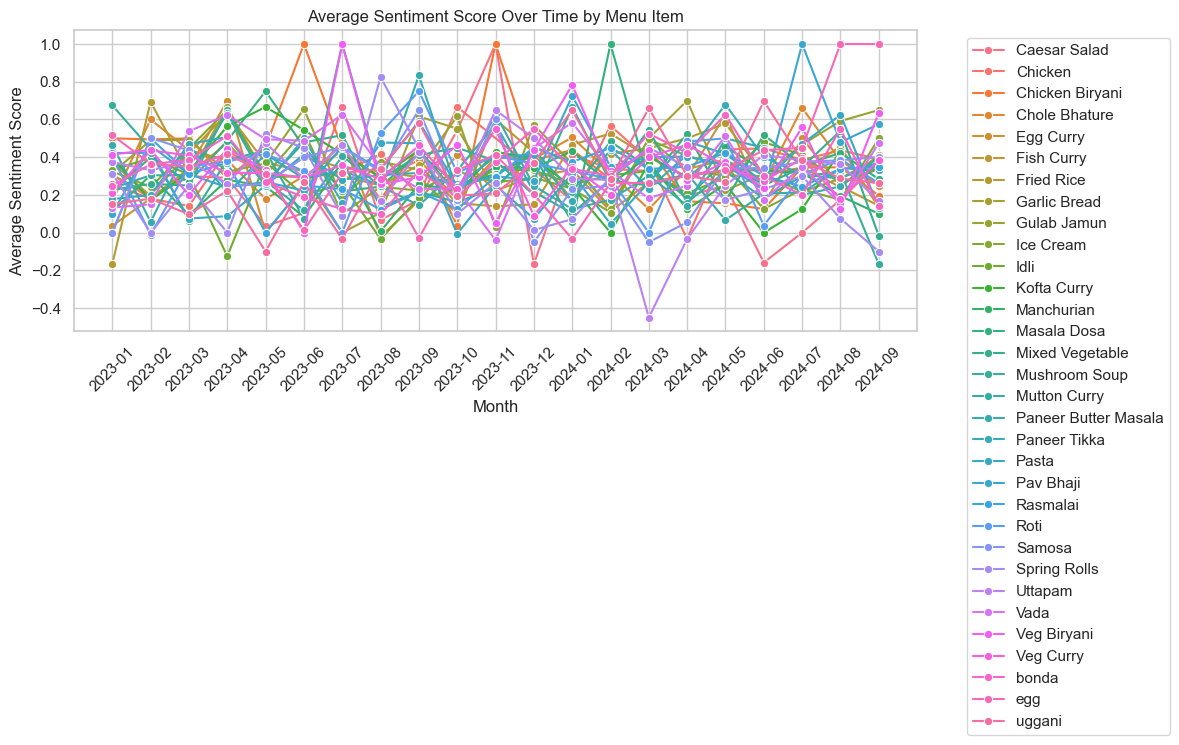

<Figure size 1200x600 with 0 Axes>

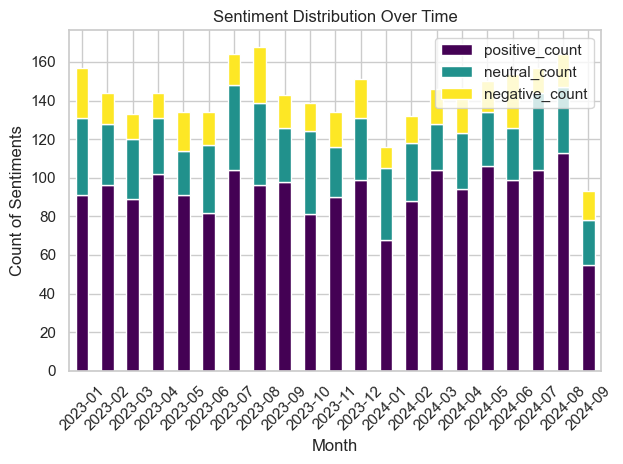

<Figure size 1200x600 with 0 Axes>

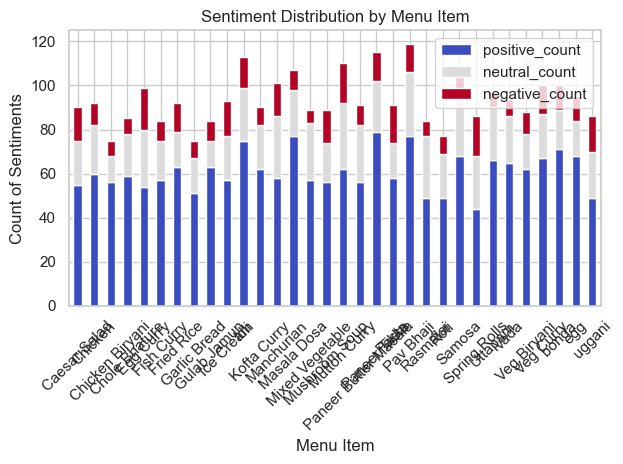

In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'monthly_menu_analysis.csv'
data = pd.read_csv(file_path)

# Set the aesthetics for the plots
sns.set(style='whitegrid')

# Plot 1: Average Sentiment Score per Menu Item Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='year_month', y='average_sentiment_score', hue='menu_item', marker='o')
plt.title('Average Sentiment Score Over Time by Menu Item')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot 2: Stacked Bar Chart for Sentiment Counts Over Months
# Prepare data for the stacked bar chart
stacked_data = data.set_index(['year_month', 'menu_item'])[['positive_count', 'neutral_count', 'negative_count']]
stacked_data = stacked_data.groupby('year_month').sum().reset_index()

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
stacked_data.set_index('year_month')[['positive_count', 'neutral_count', 'negative_count']].plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Sentiment Distribution Over Time')
plt.xlabel('Month')
plt.ylabel('Count of Sentiments')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Plot 3: Sentiment Distribution Comparison by Menu Item
# Create stacked bar chart for menu items
menu_sentiment = data.groupby('menu_item')[['positive_count', 'neutral_count', 'negative_count']].sum()

plt.figure(figsize=(12, 6))
menu_sentiment.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Sentiment Distribution by Menu Item')
plt.xlabel('Menu Item')
plt.ylabel('Count of Sentiments')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


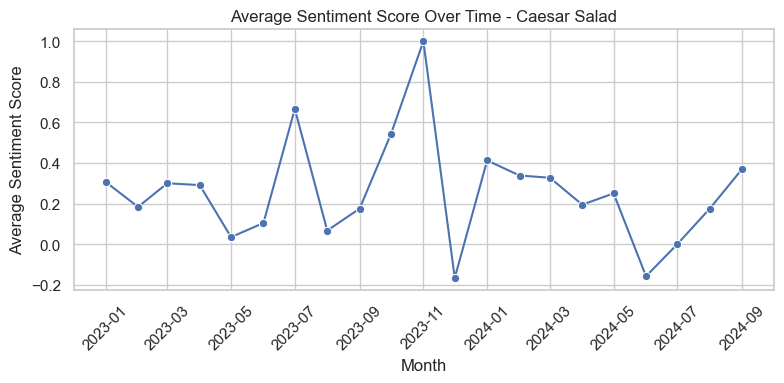

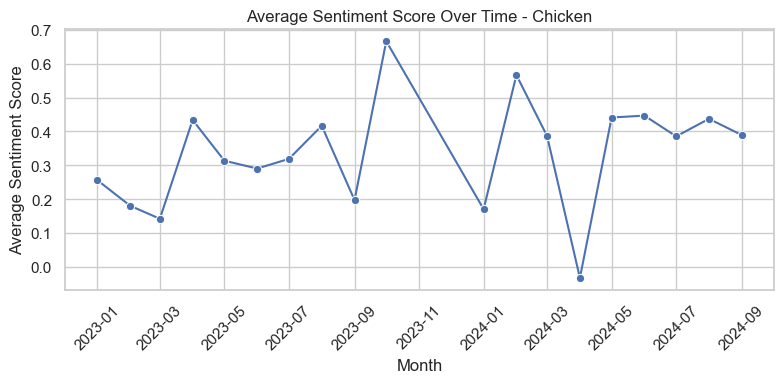

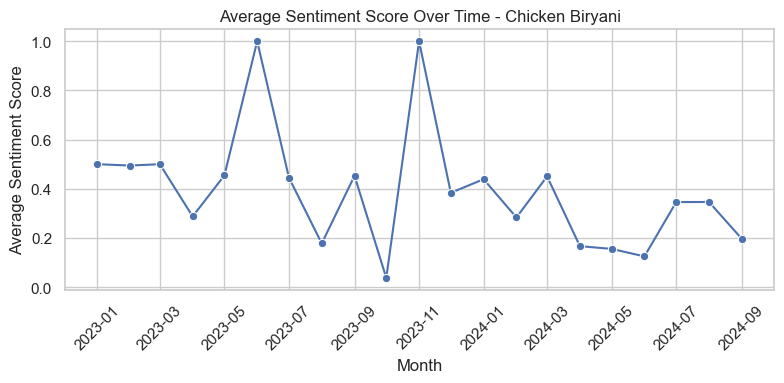

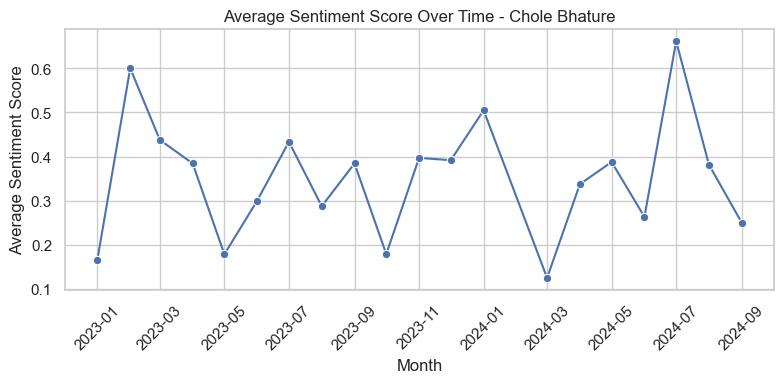

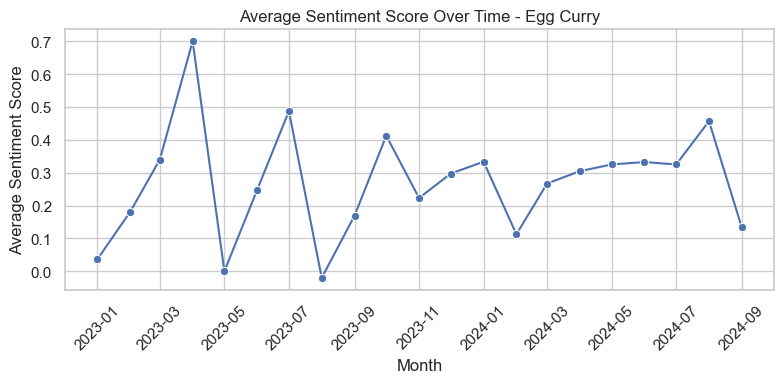

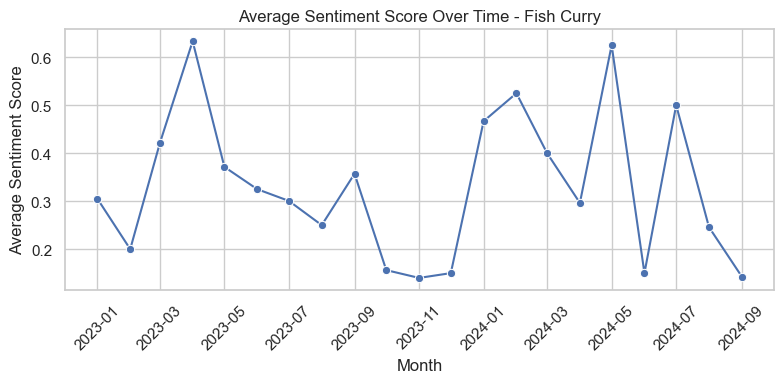

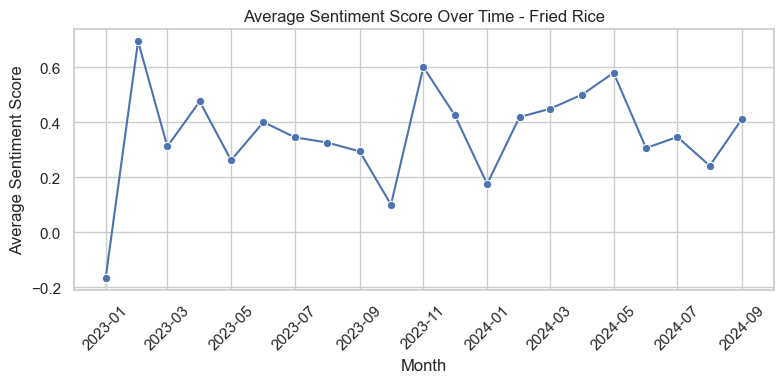

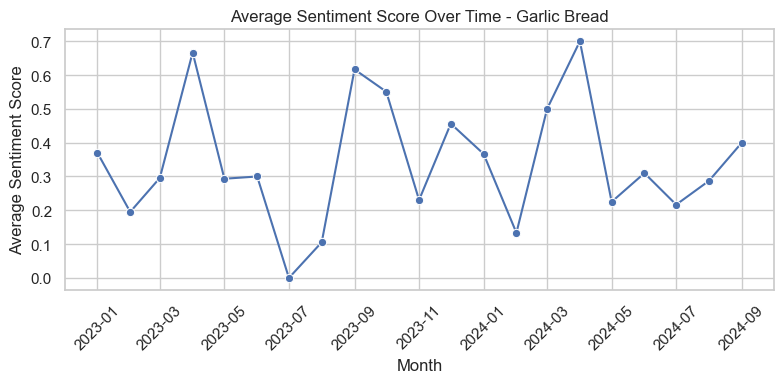

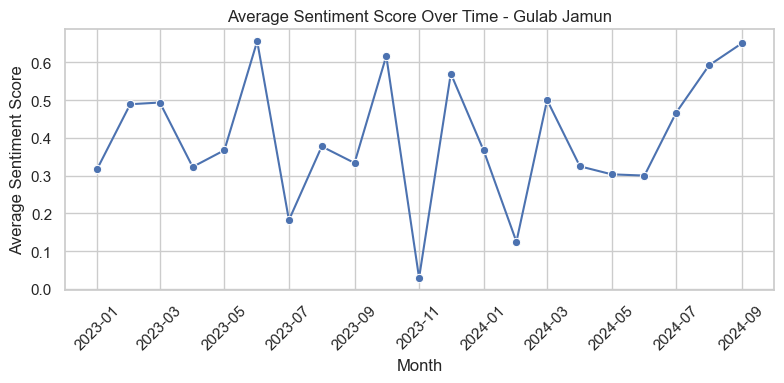

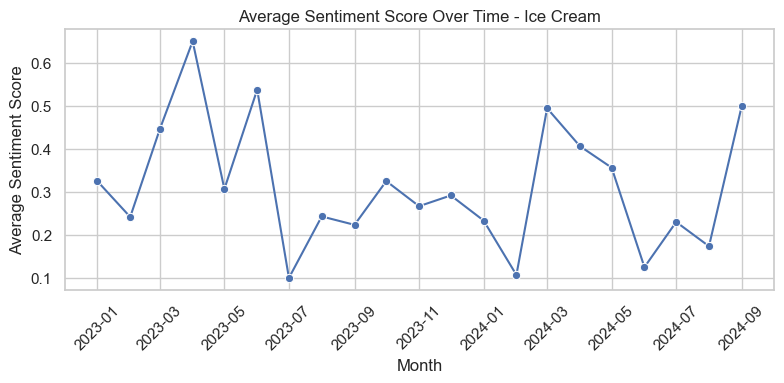

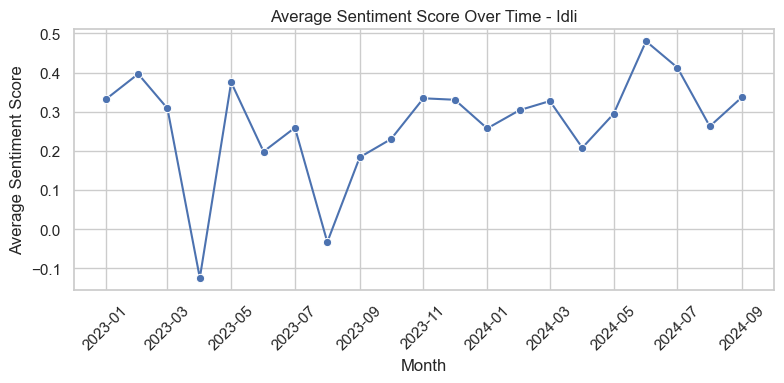

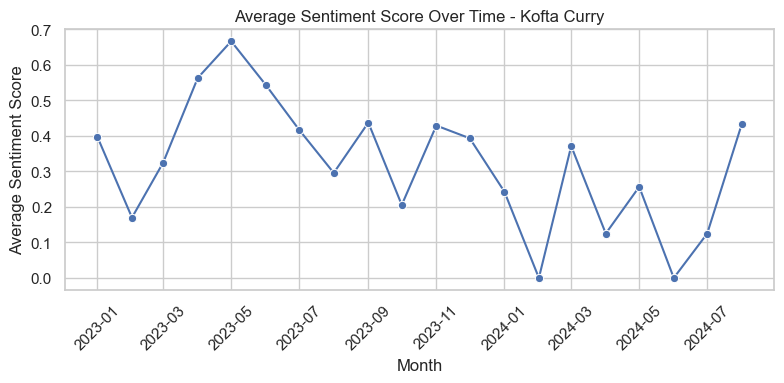

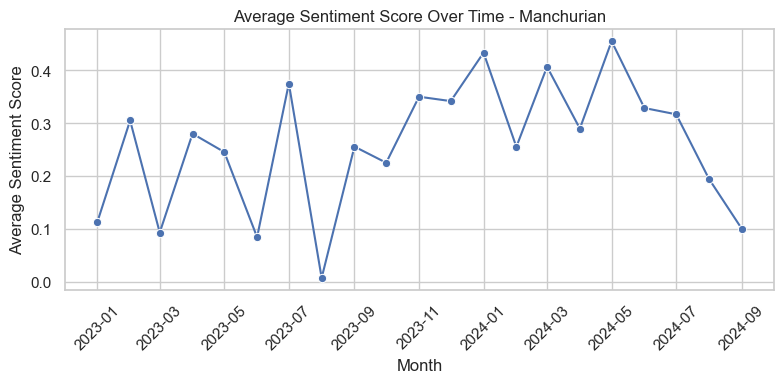

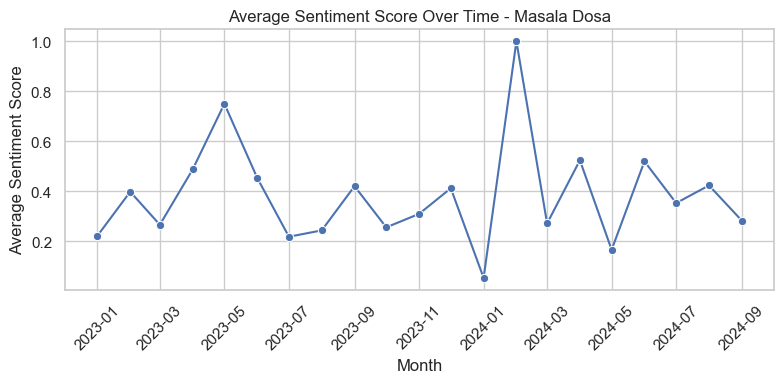

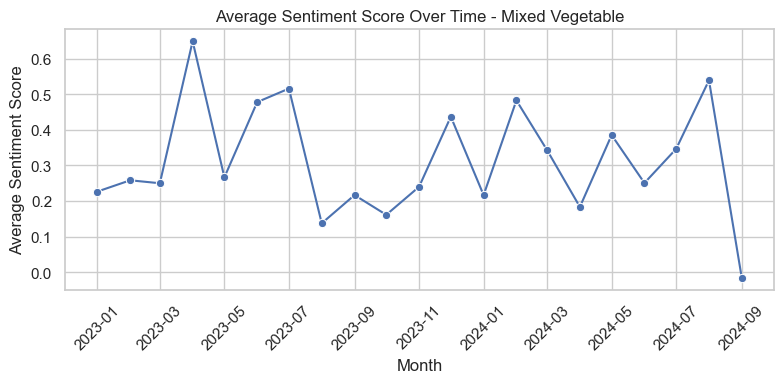

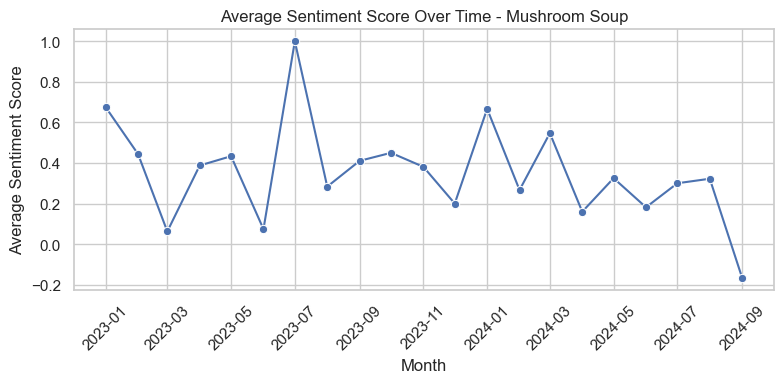

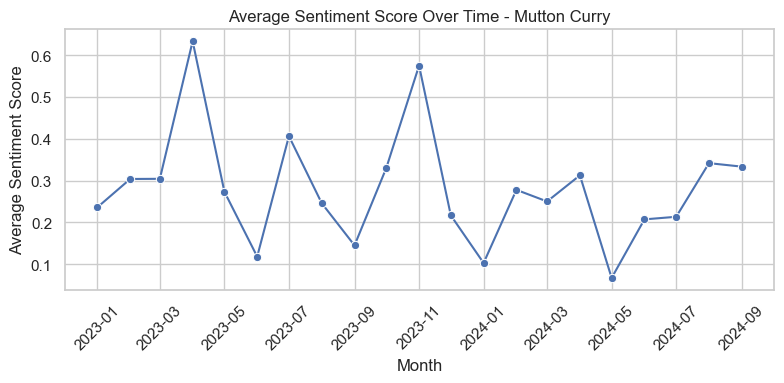

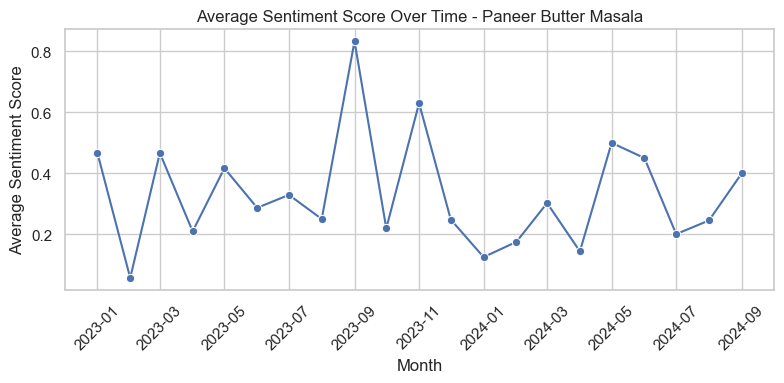

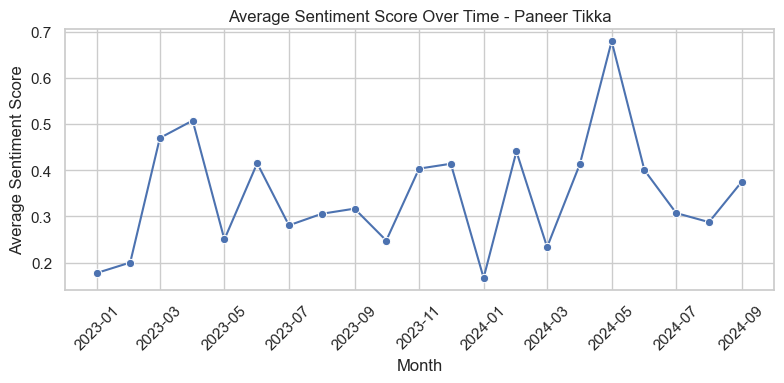

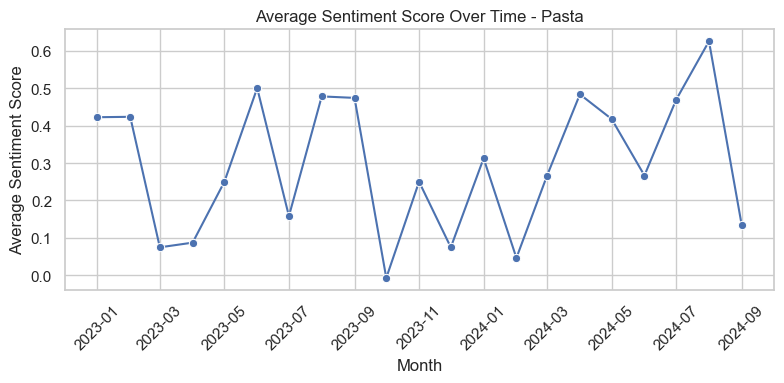

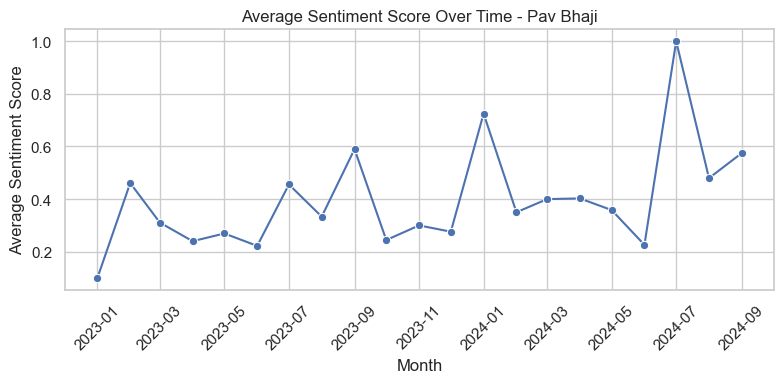

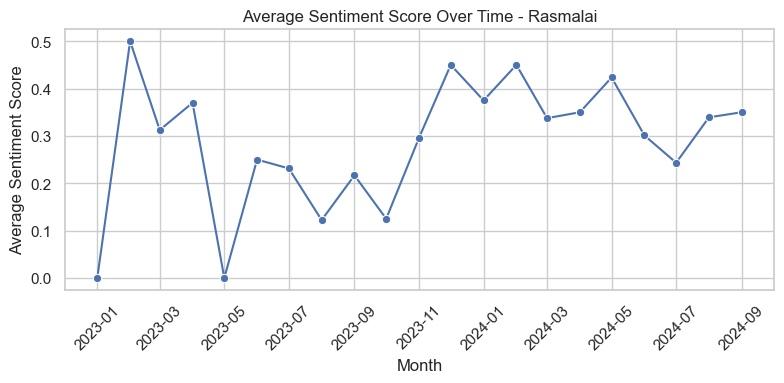

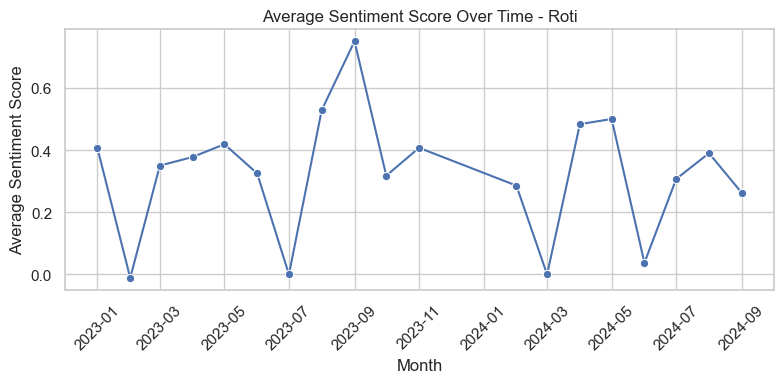

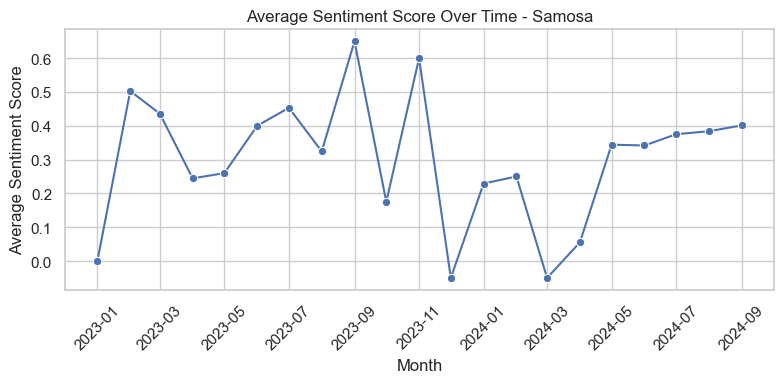

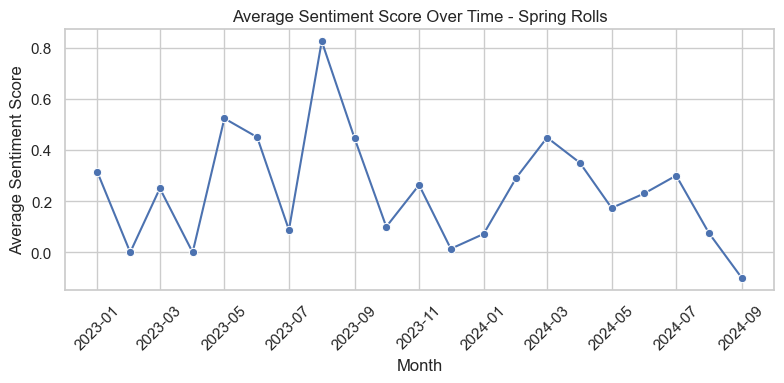

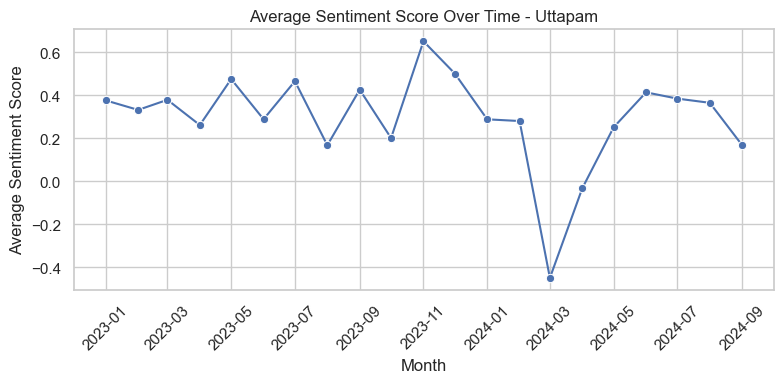

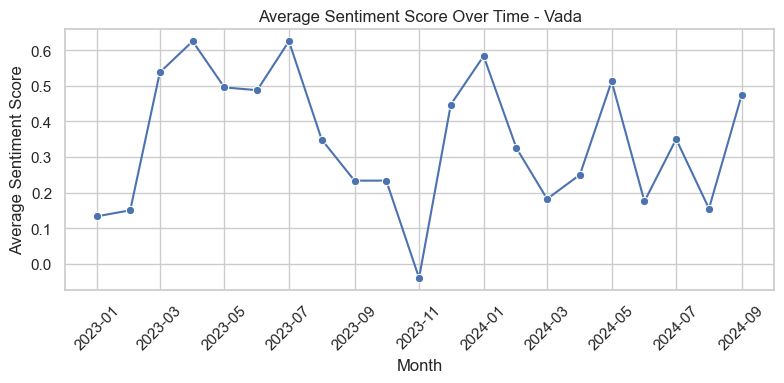

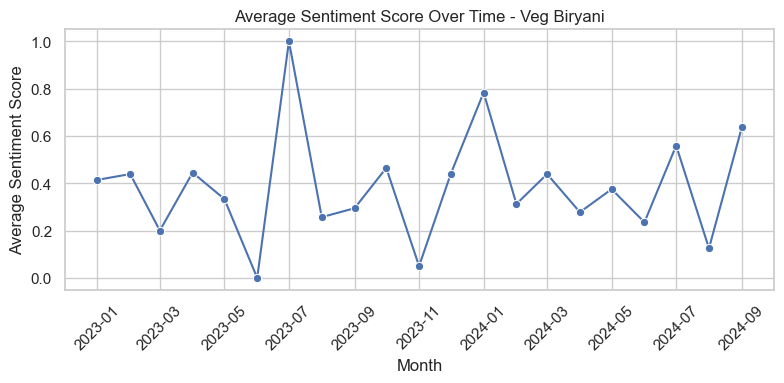

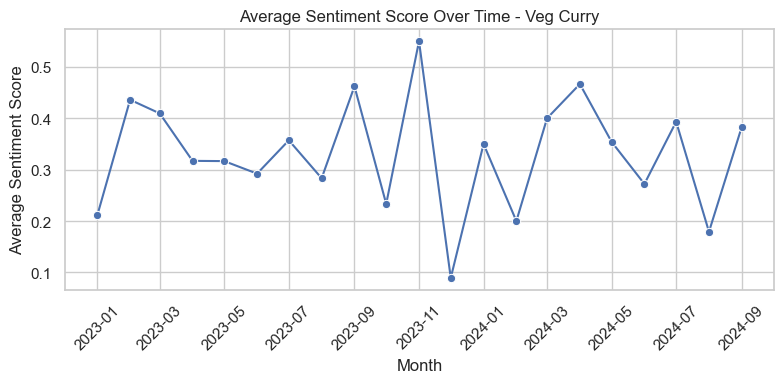

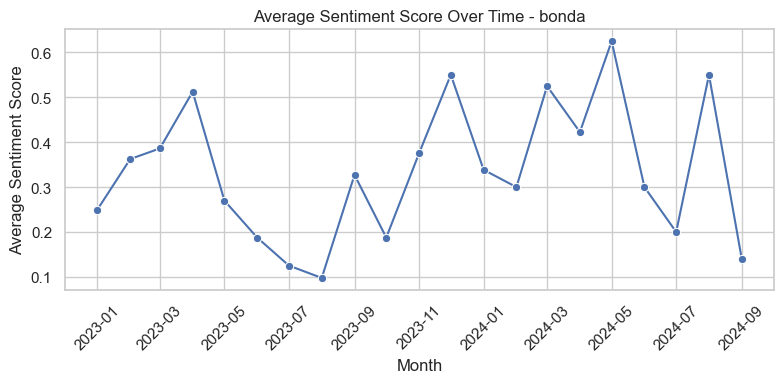

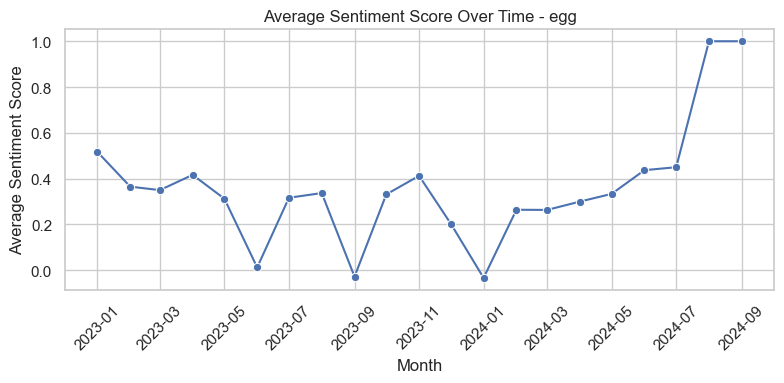

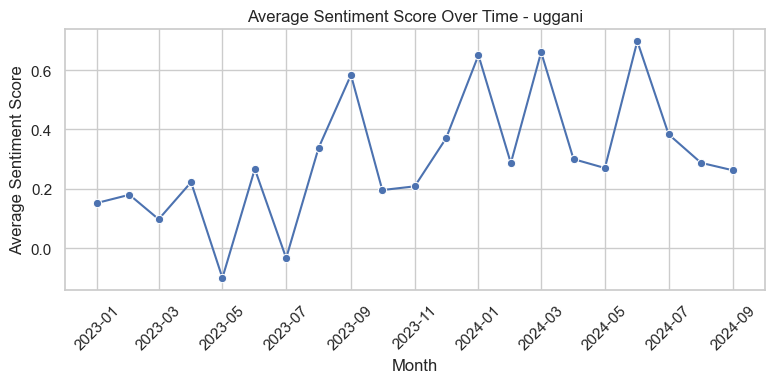

<Figure size 800x400 with 0 Axes>

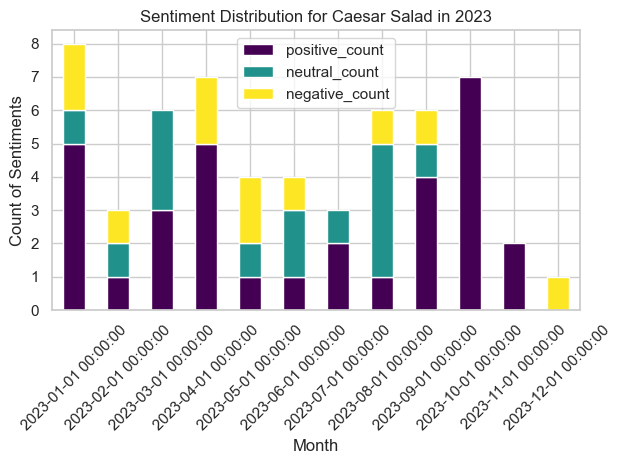

<Figure size 800x400 with 0 Axes>

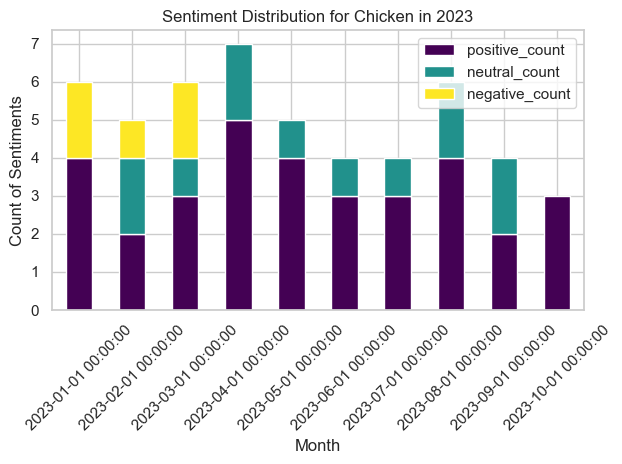

<Figure size 800x400 with 0 Axes>

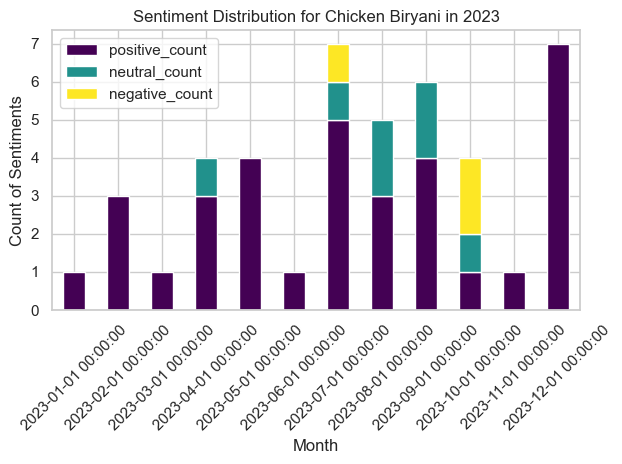

<Figure size 800x400 with 0 Axes>

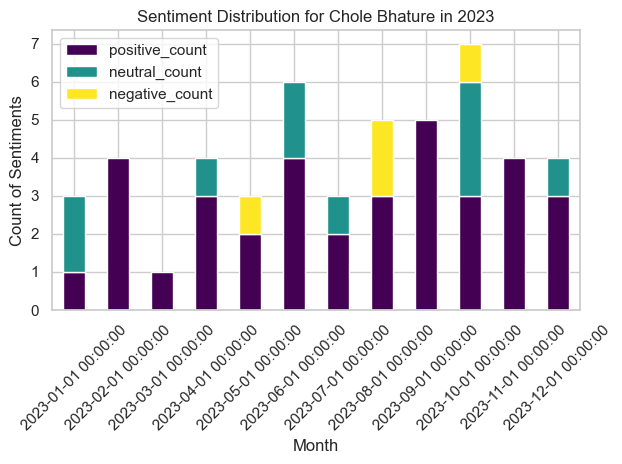

<Figure size 800x400 with 0 Axes>

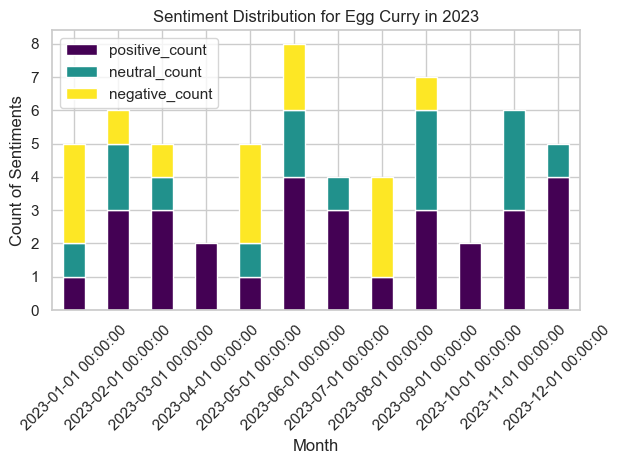

<Figure size 800x400 with 0 Axes>

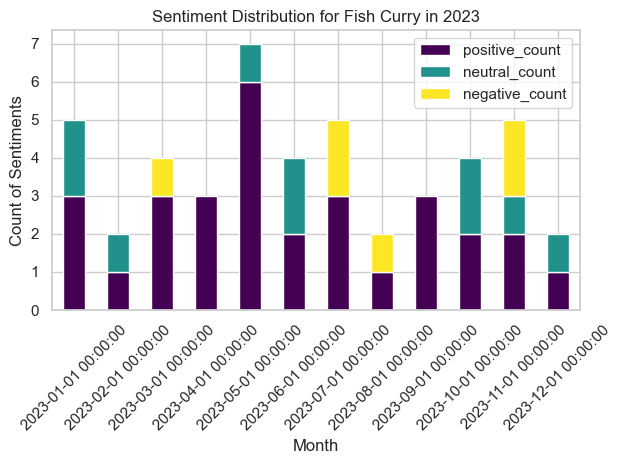

<Figure size 800x400 with 0 Axes>

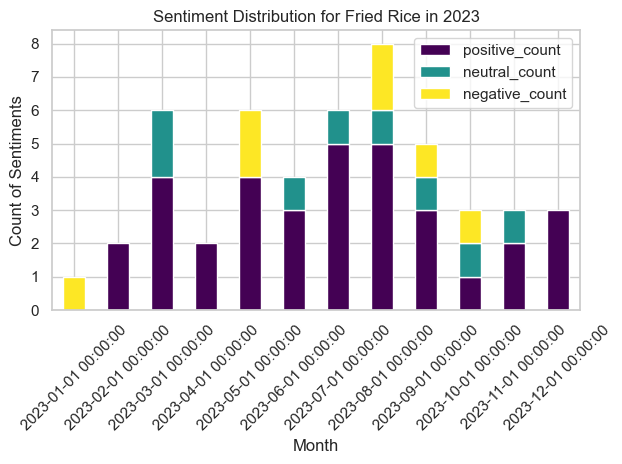

<Figure size 800x400 with 0 Axes>

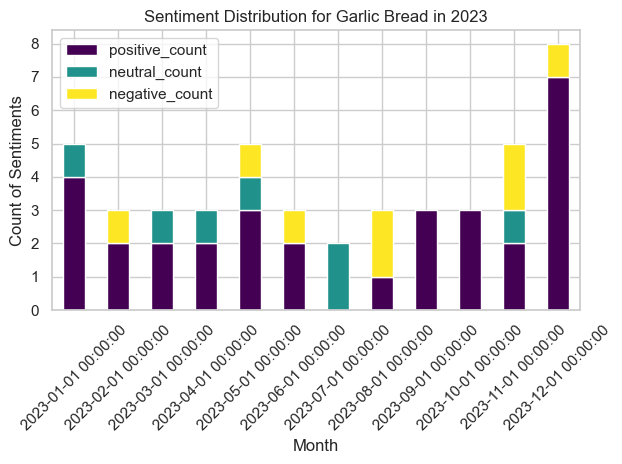

<Figure size 800x400 with 0 Axes>

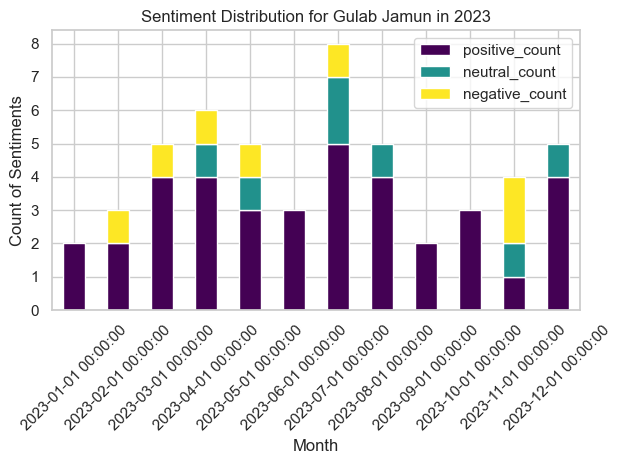

<Figure size 800x400 with 0 Axes>

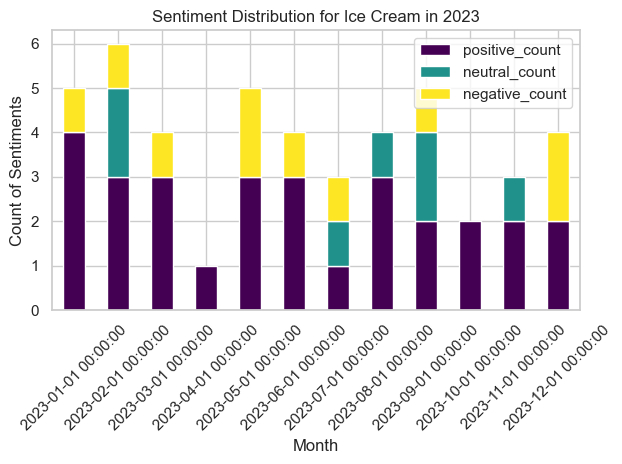

<Figure size 800x400 with 0 Axes>

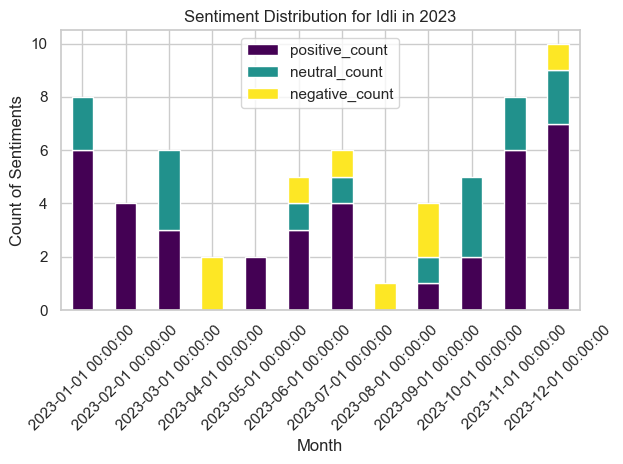

<Figure size 800x400 with 0 Axes>

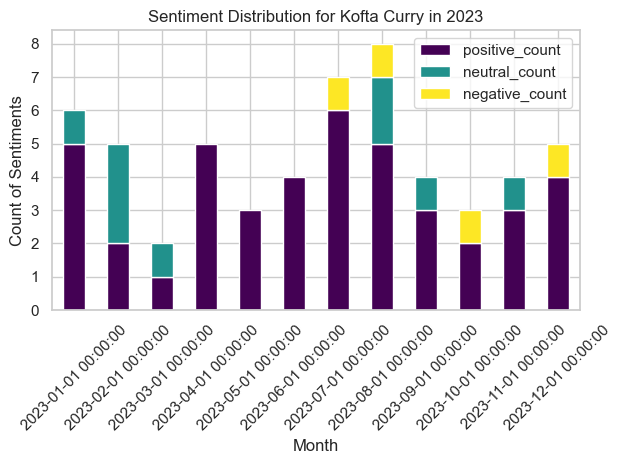

<Figure size 800x400 with 0 Axes>

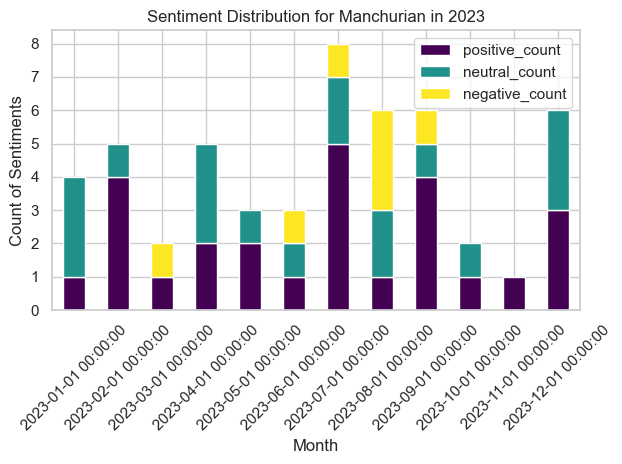

<Figure size 800x400 with 0 Axes>

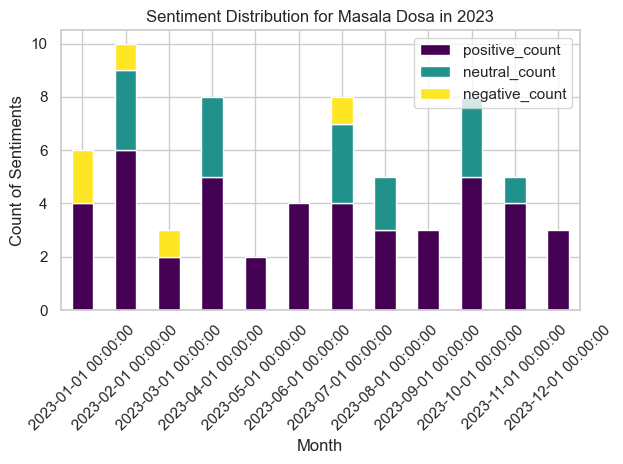

<Figure size 800x400 with 0 Axes>

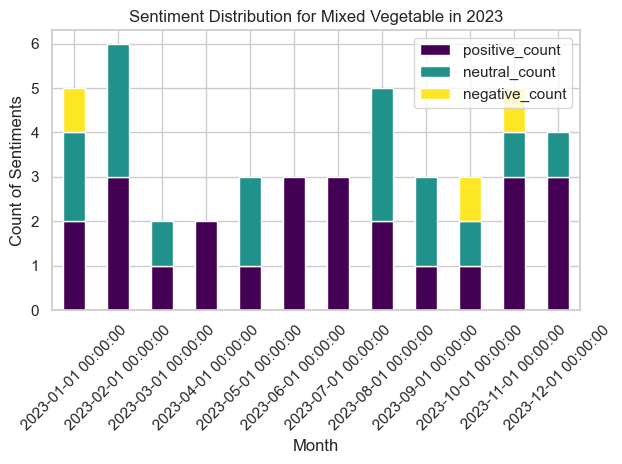

<Figure size 800x400 with 0 Axes>

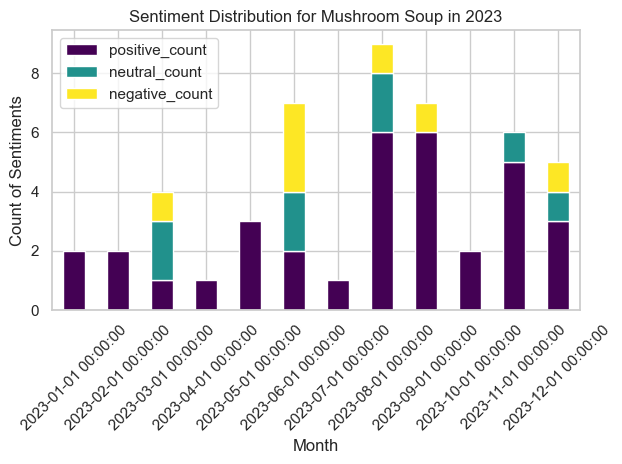

<Figure size 800x400 with 0 Axes>

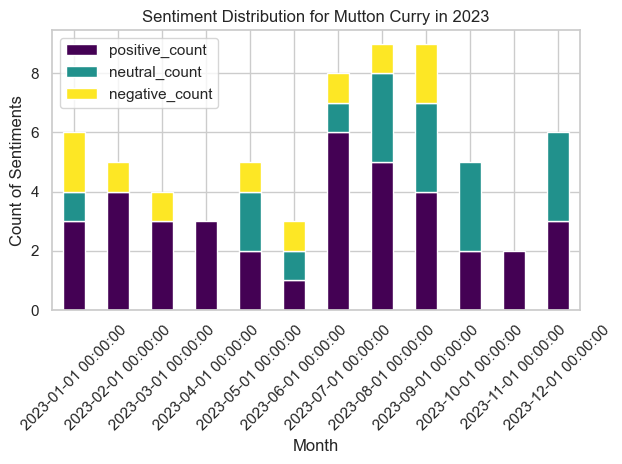

<Figure size 800x400 with 0 Axes>

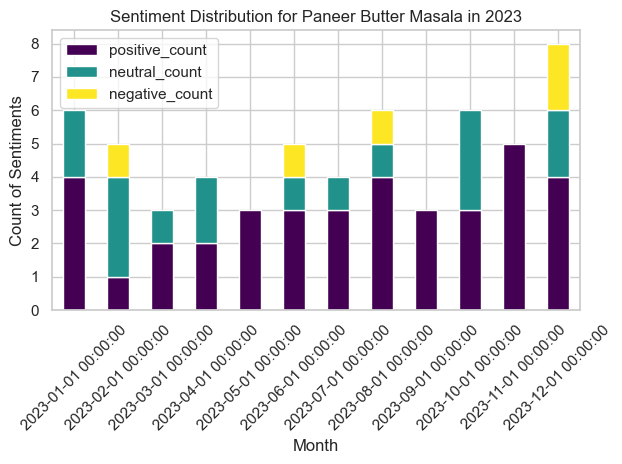

<Figure size 800x400 with 0 Axes>

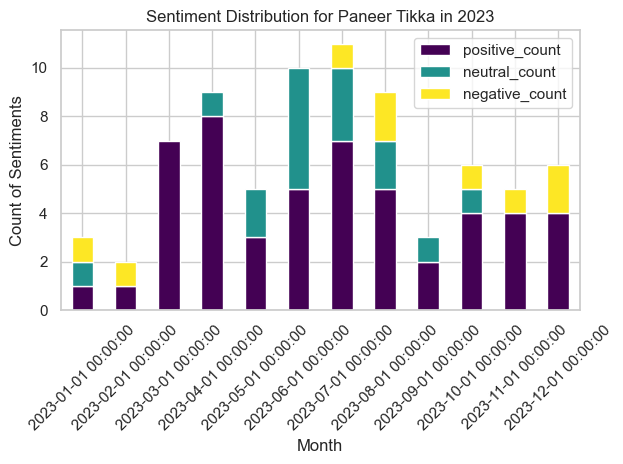

<Figure size 800x400 with 0 Axes>

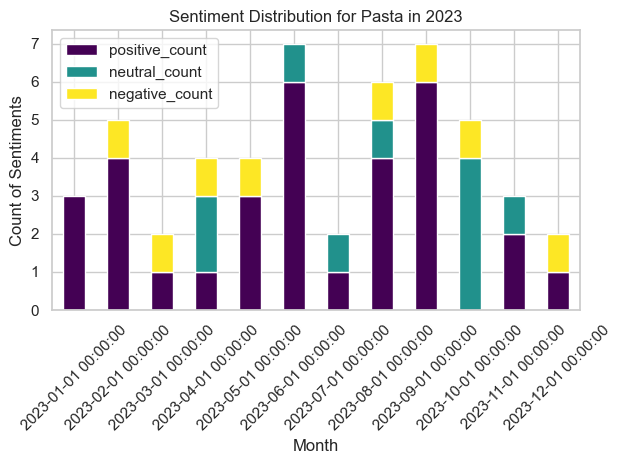

<Figure size 800x400 with 0 Axes>

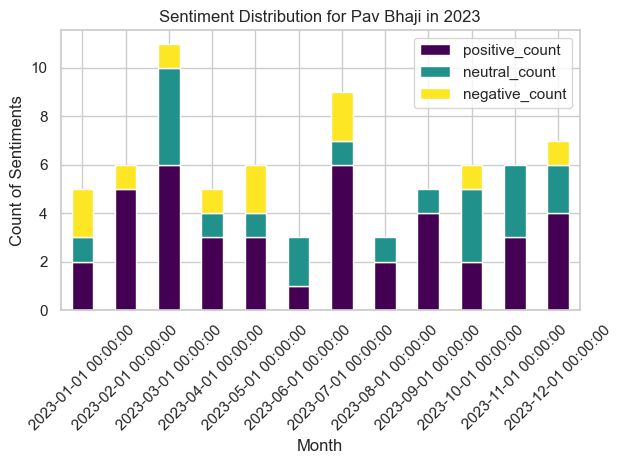

<Figure size 800x400 with 0 Axes>

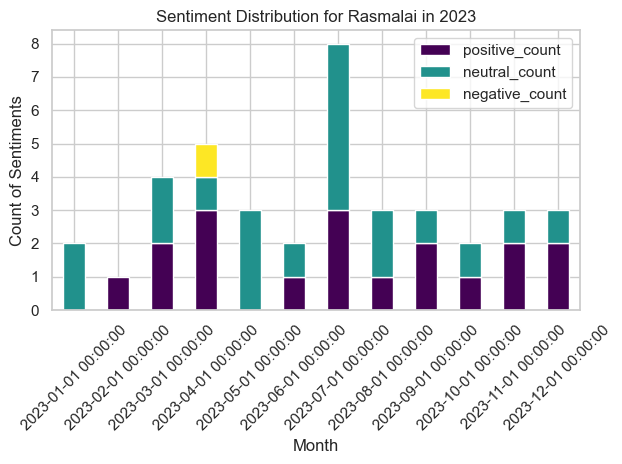

<Figure size 800x400 with 0 Axes>

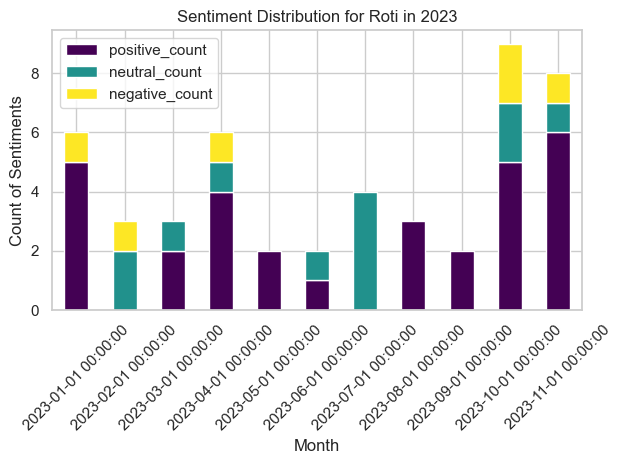

<Figure size 800x400 with 0 Axes>

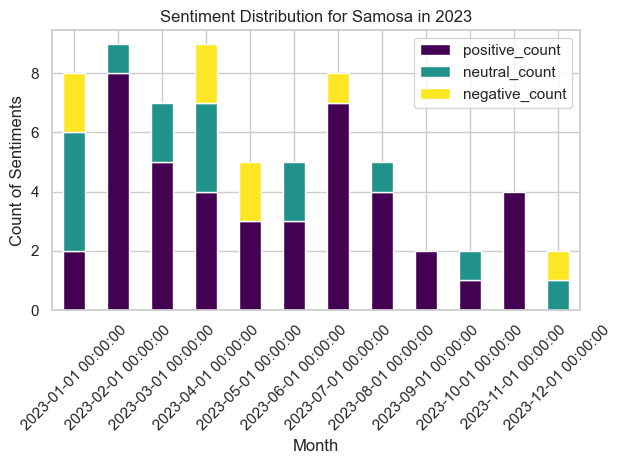

<Figure size 800x400 with 0 Axes>

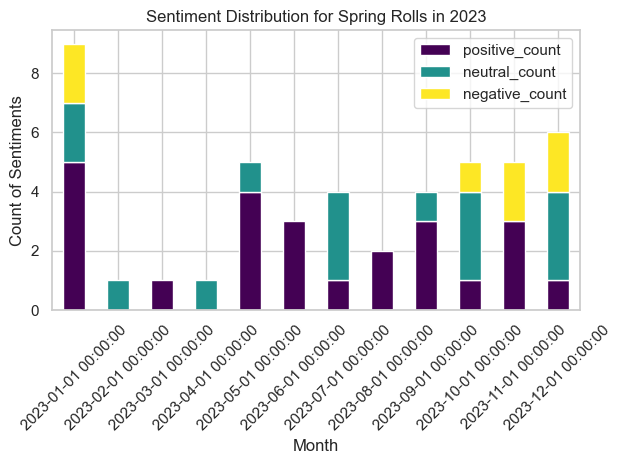

<Figure size 800x400 with 0 Axes>

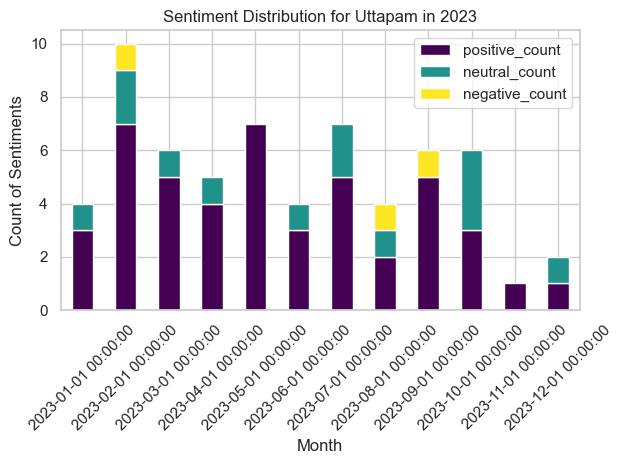

<Figure size 800x400 with 0 Axes>

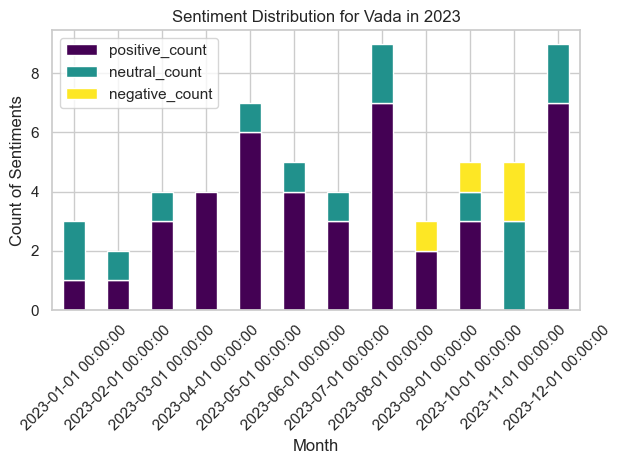

<Figure size 800x400 with 0 Axes>

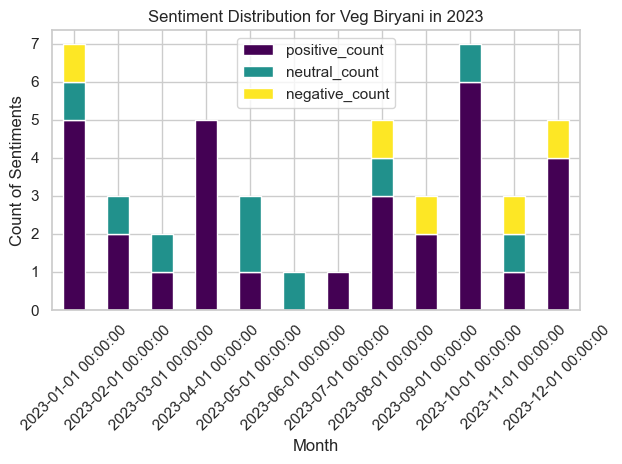

<Figure size 800x400 with 0 Axes>

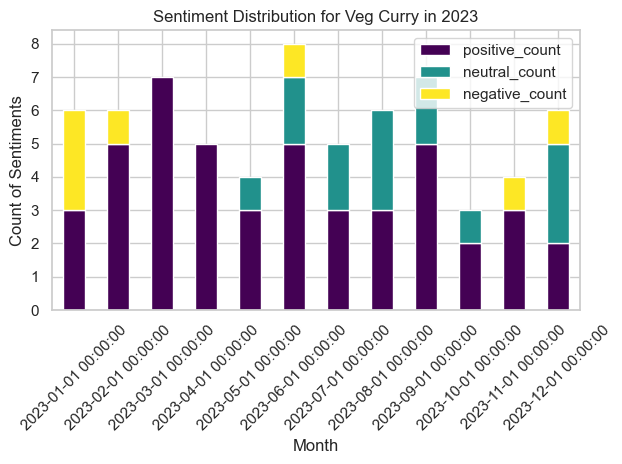

<Figure size 800x400 with 0 Axes>

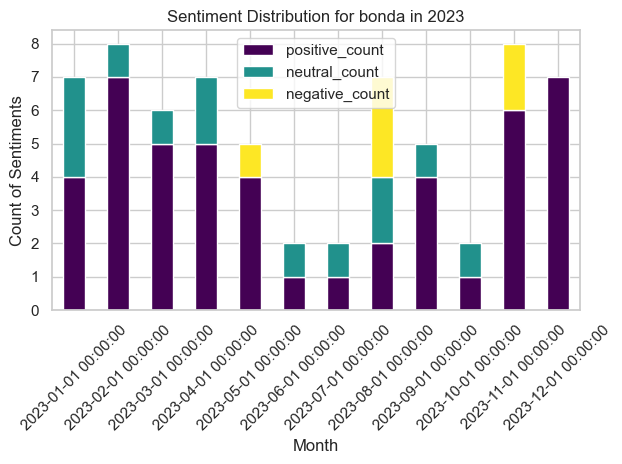

<Figure size 800x400 with 0 Axes>

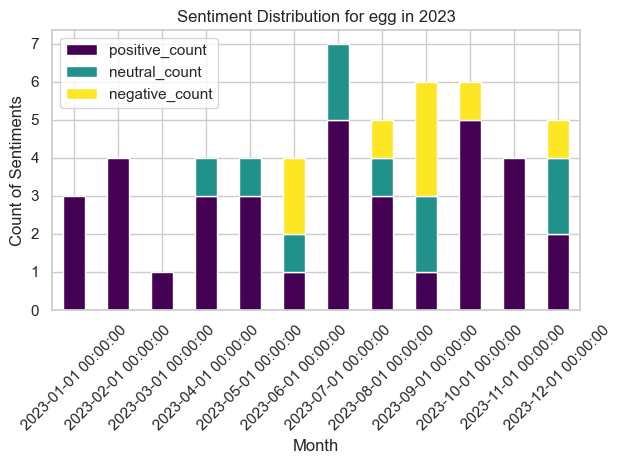

<Figure size 800x400 with 0 Axes>

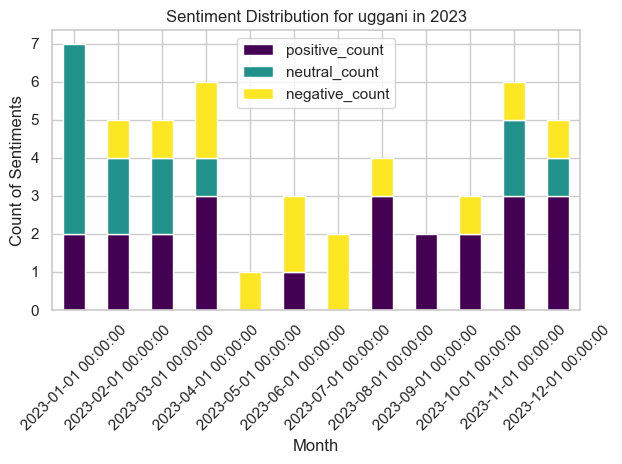

<Figure size 800x400 with 0 Axes>

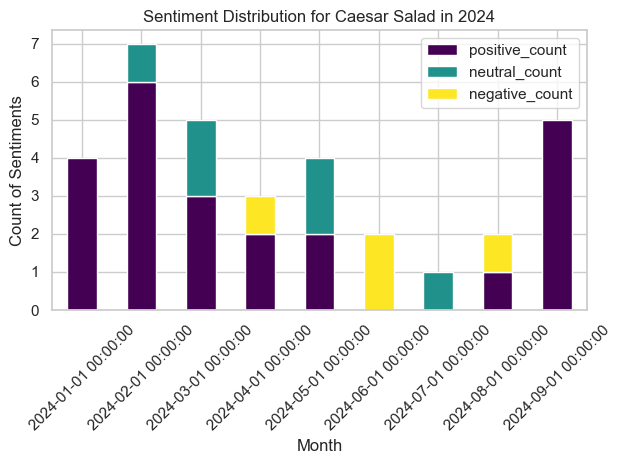

<Figure size 800x400 with 0 Axes>

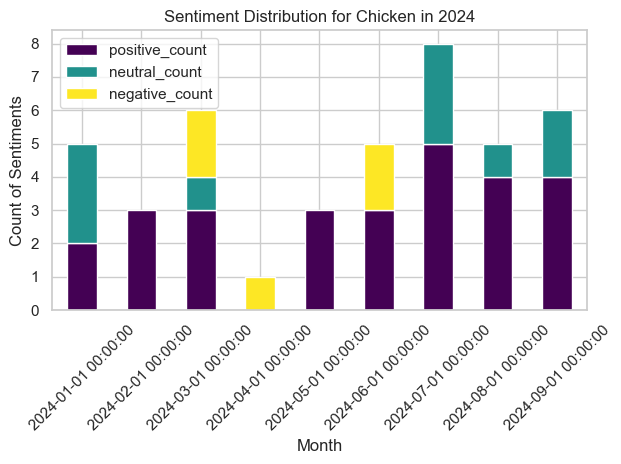

<Figure size 800x400 with 0 Axes>

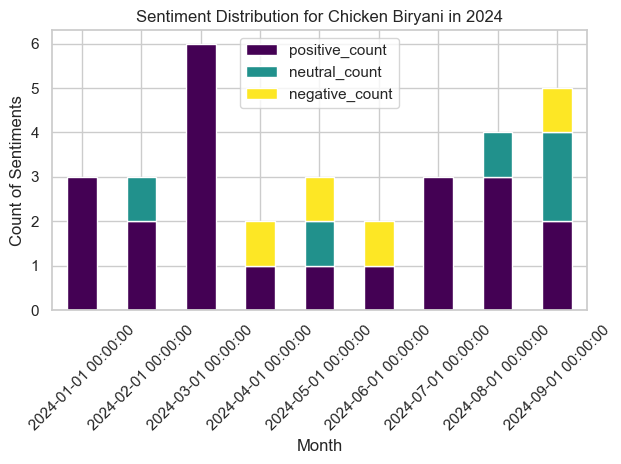

<Figure size 800x400 with 0 Axes>

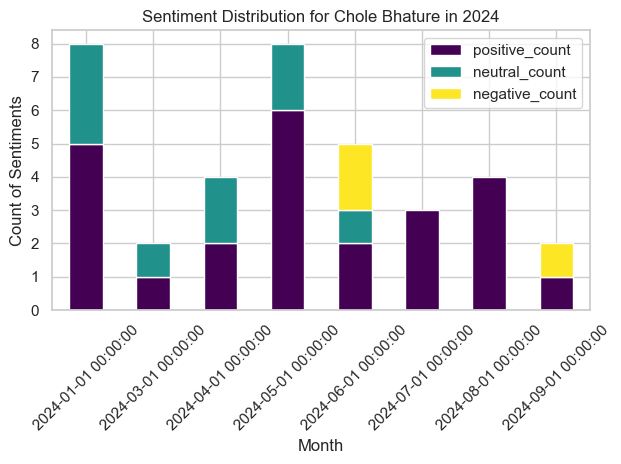

<Figure size 800x400 with 0 Axes>

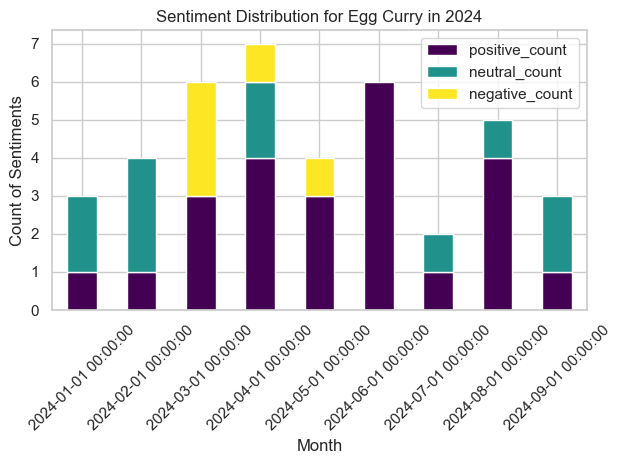

<Figure size 800x400 with 0 Axes>

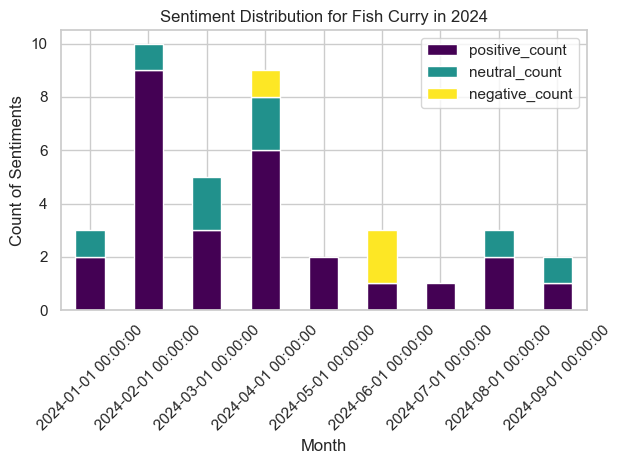

<Figure size 800x400 with 0 Axes>

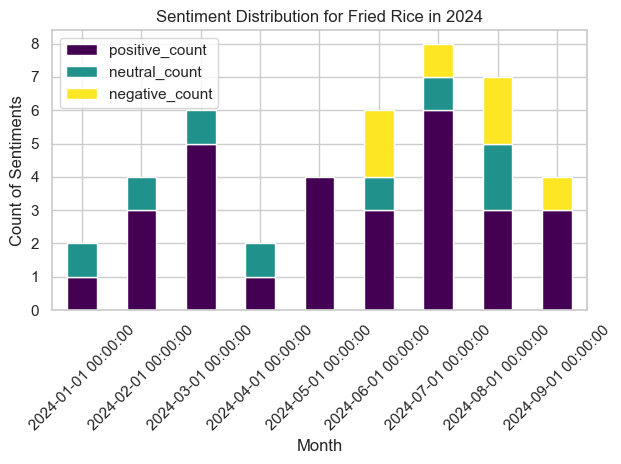

<Figure size 800x400 with 0 Axes>

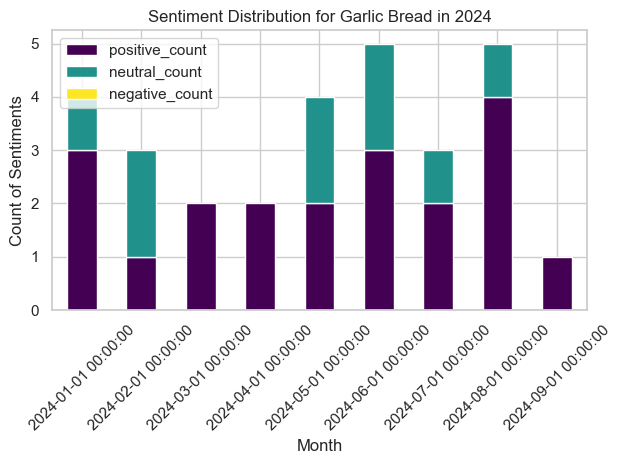

<Figure size 800x400 with 0 Axes>

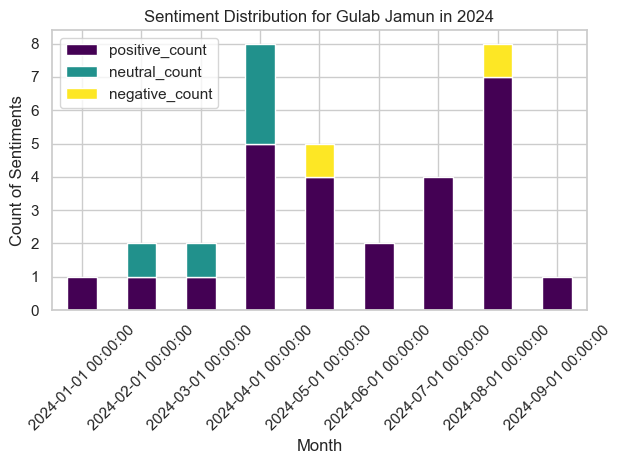

<Figure size 800x400 with 0 Axes>

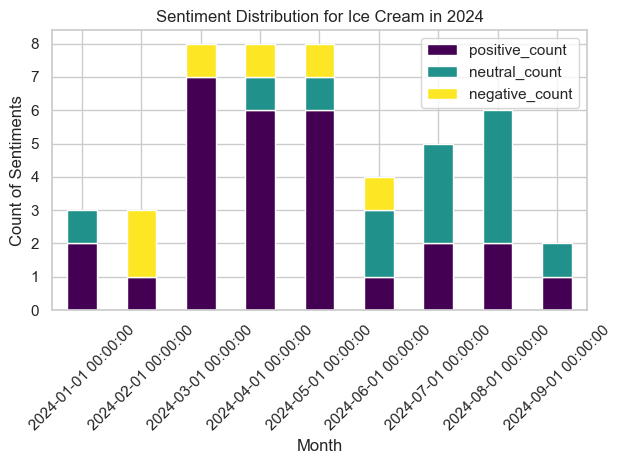

<Figure size 800x400 with 0 Axes>

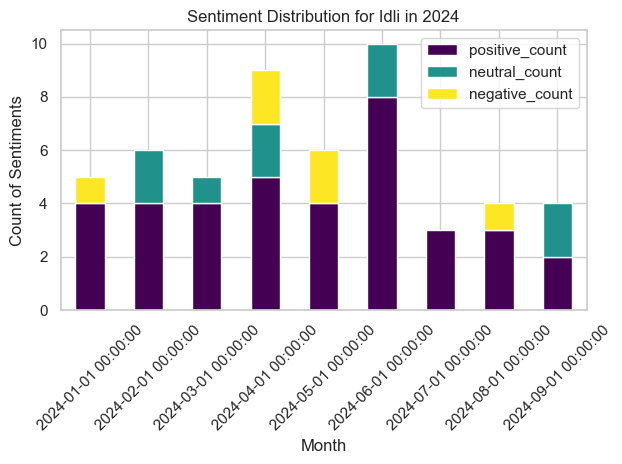

<Figure size 800x400 with 0 Axes>

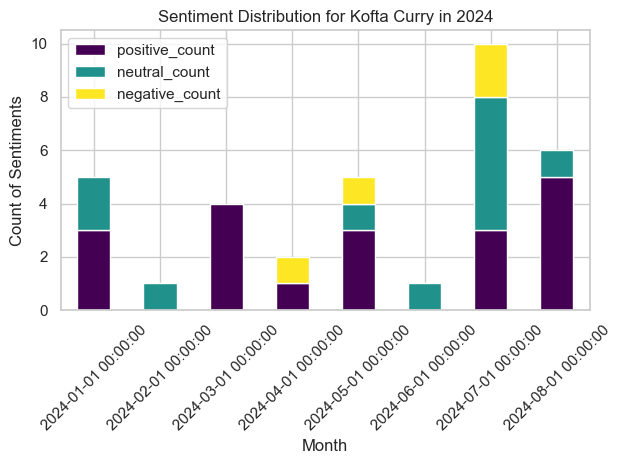

<Figure size 800x400 with 0 Axes>

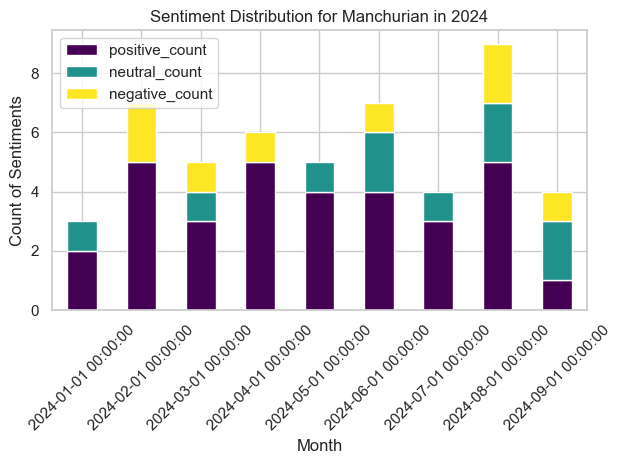

<Figure size 800x400 with 0 Axes>

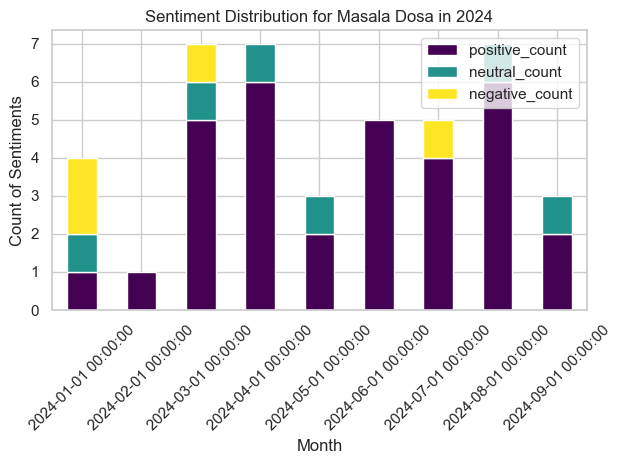

<Figure size 800x400 with 0 Axes>

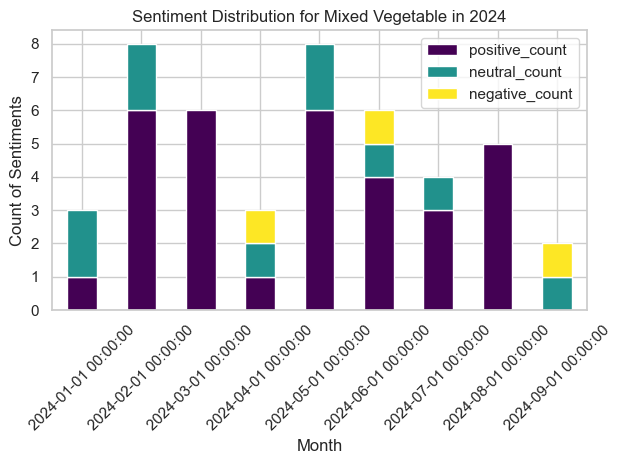

<Figure size 800x400 with 0 Axes>

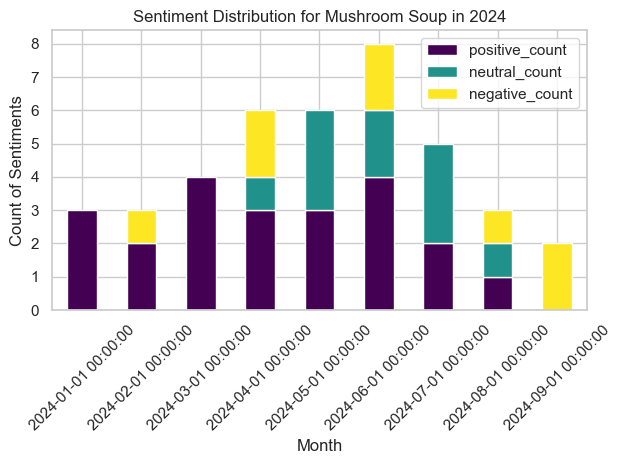

<Figure size 800x400 with 0 Axes>

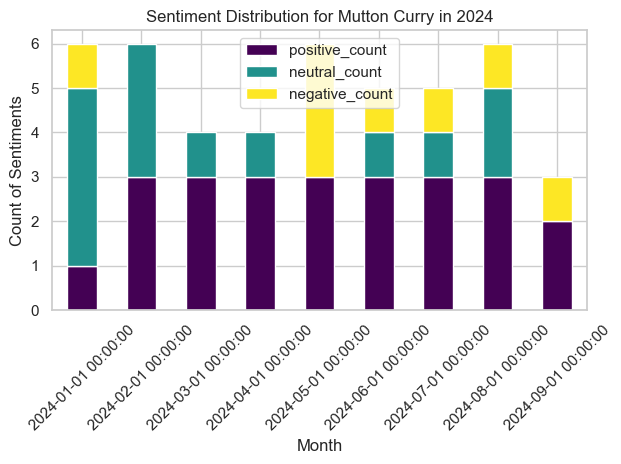

<Figure size 800x400 with 0 Axes>

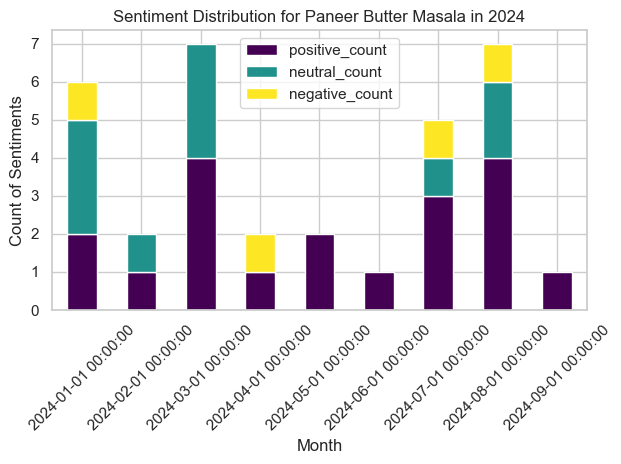

<Figure size 800x400 with 0 Axes>

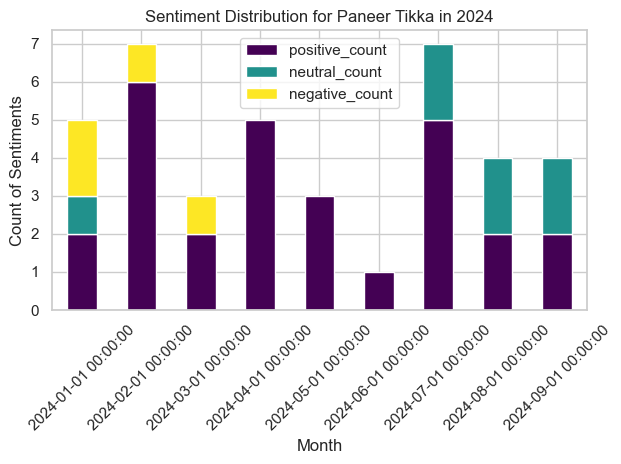

<Figure size 800x400 with 0 Axes>

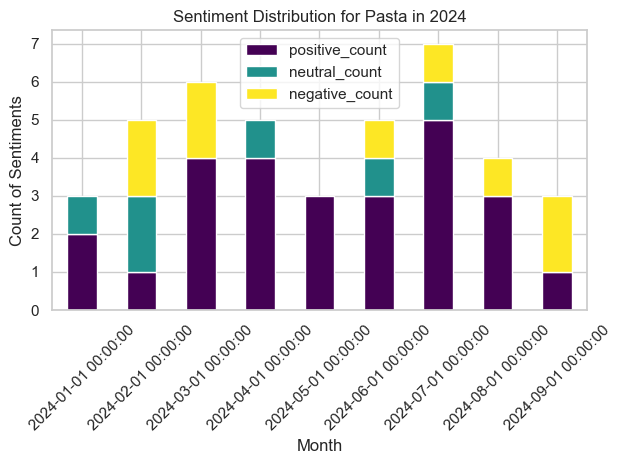

<Figure size 800x400 with 0 Axes>

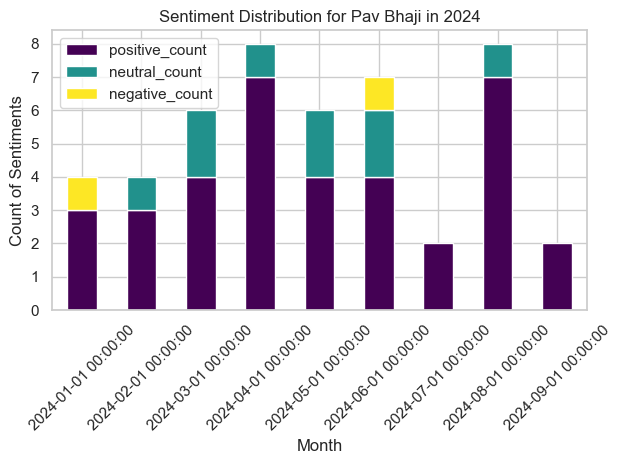

<Figure size 800x400 with 0 Axes>

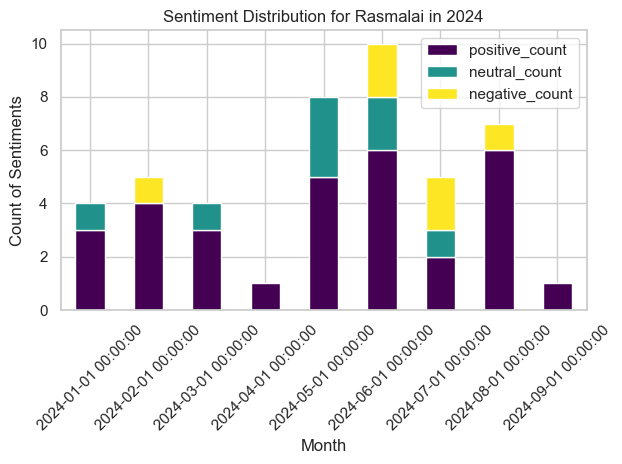

<Figure size 800x400 with 0 Axes>

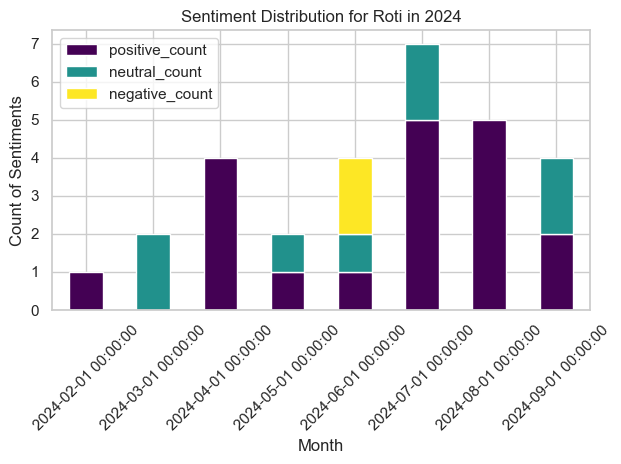

<Figure size 800x400 with 0 Axes>

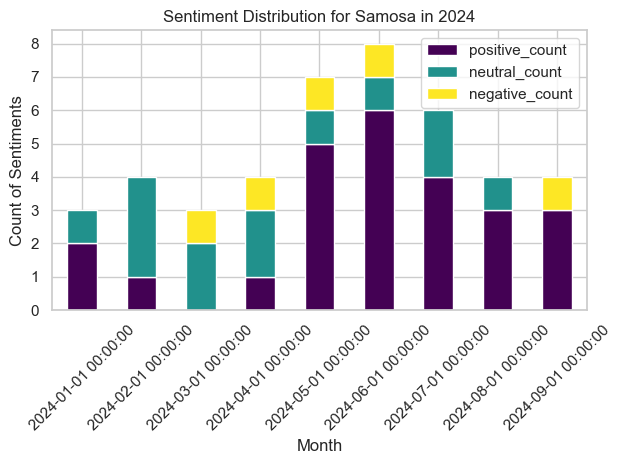

<Figure size 800x400 with 0 Axes>

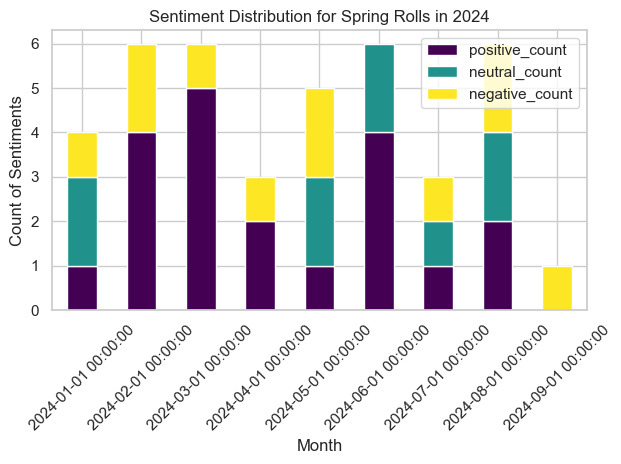

<Figure size 800x400 with 0 Axes>

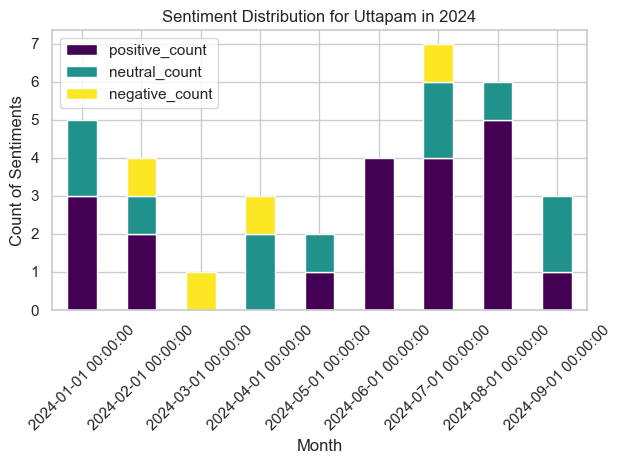

<Figure size 800x400 with 0 Axes>

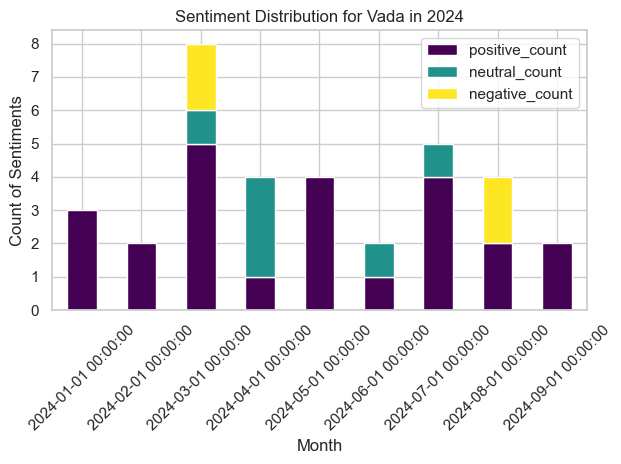

<Figure size 800x400 with 0 Axes>

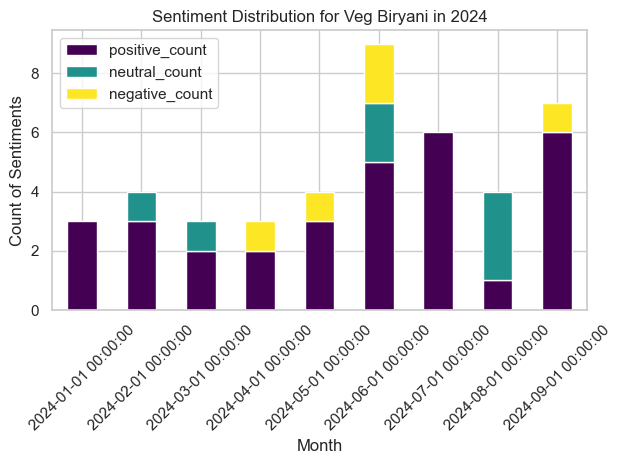

<Figure size 800x400 with 0 Axes>

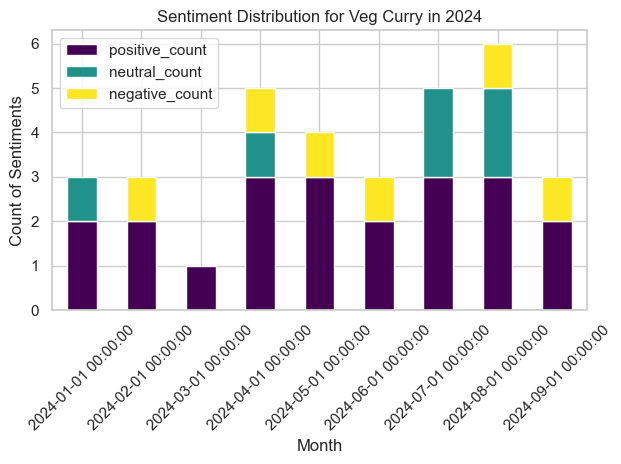

<Figure size 800x400 with 0 Axes>

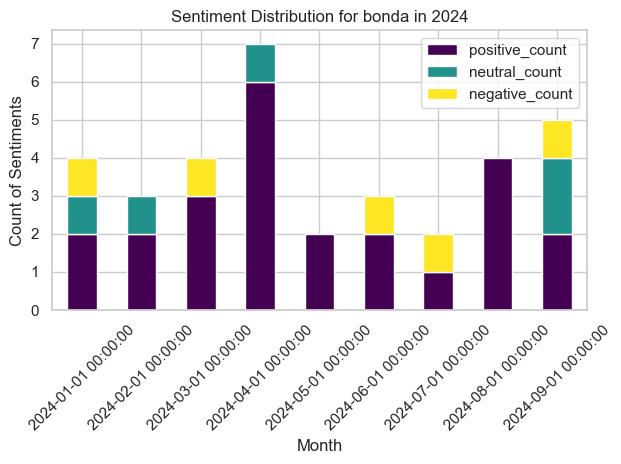

<Figure size 800x400 with 0 Axes>

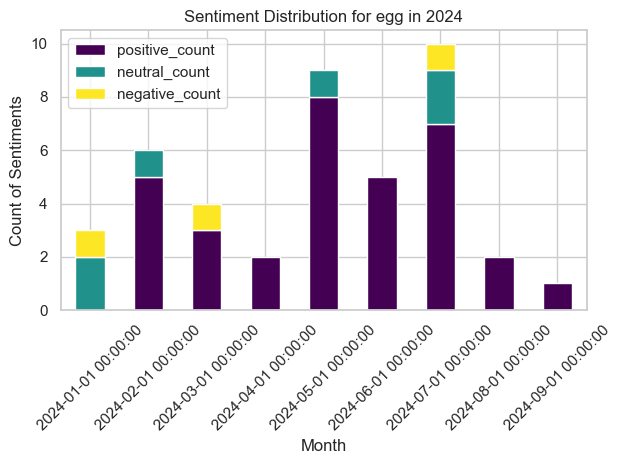

<Figure size 800x400 with 0 Axes>

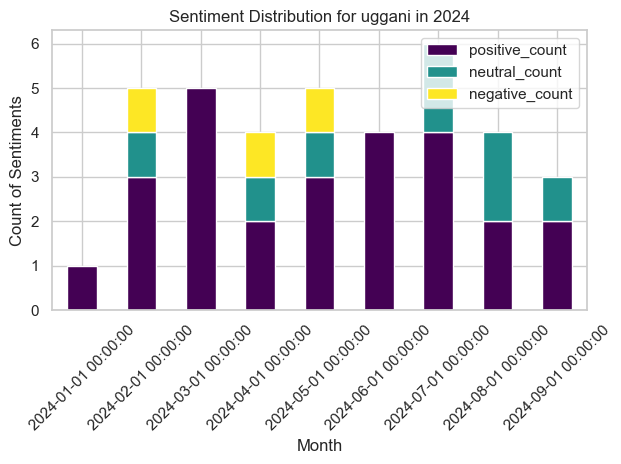

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'monthly_menu_analysis.csv'
data = pd.read_csv(file_path)

# Set the aesthetics for the plots
sns.set(style='whitegrid')

# Convert 'year_month' to datetime for easier handling
data['year_month'] = pd.to_datetime(data['year_month'])

# Get the unique menu items and years
menu_items = data['menu_item'].unique()
years = data['year_month'].dt.year.unique()

# Plot 1: Average Sentiment Score Over Time by Menu Item
for item in menu_items:
    plt.figure(figsize=(8, 4))
    item_data = data[data['menu_item'] == item]
    sns.lineplot(data=item_data, x='year_month', y='average_sentiment_score', marker='o')
    plt.title(f'Average Sentiment Score Over Time - {item}')
    plt.xlabel('Month')
    plt.ylabel('Average Sentiment Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot 2: Sentiment Distribution by Menu Item and Year
for year in years:
    yearly_data = data[data['year_month'].dt.year == year]
    for item in menu_items:
        item_yearly_data = yearly_data[yearly_data['menu_item'] == item]
        if not item_yearly_data.empty:
            plt.figure(figsize=(8, 4))
            item_yearly_data.set_index('year_month')[['positive_count', 'neutral_count', 'negative_count']].plot(kind='bar', stacked=True, colormap='viridis')
            plt.title(f'Sentiment Distribution for {item} in {year}')
            plt.xlabel('Month')
            plt.ylabel('Count of Sentiments')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()


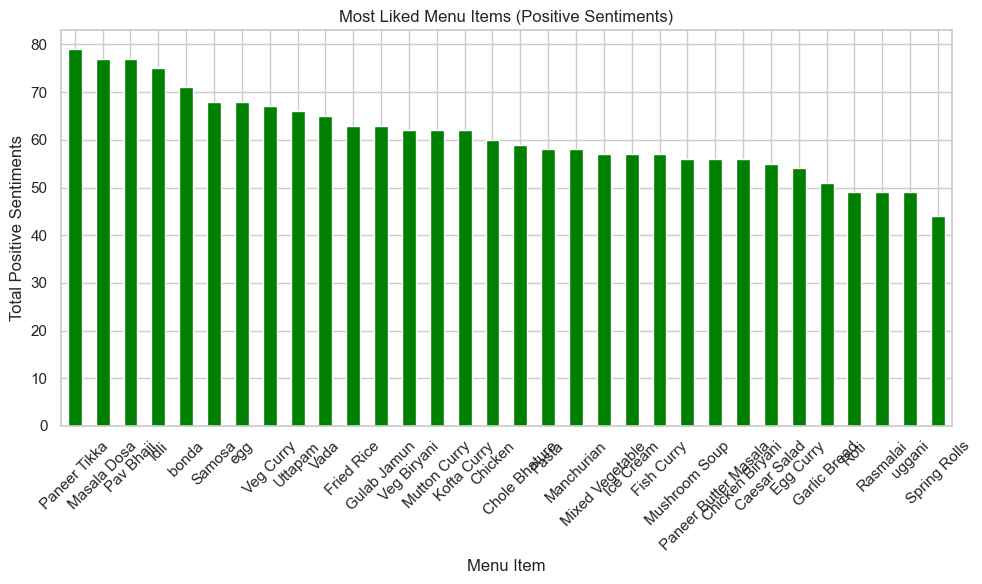

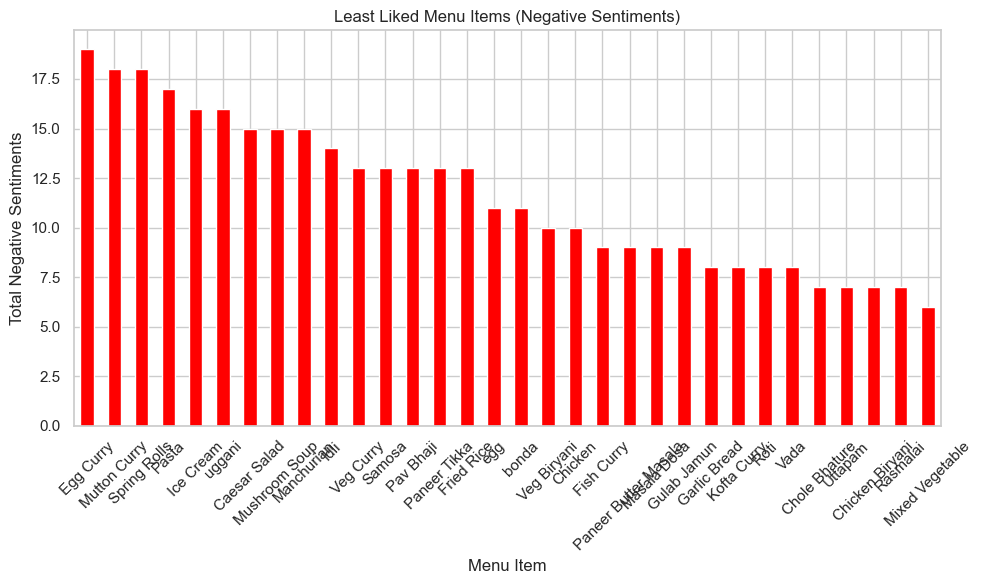

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'monthly_menu_analysis.csv'
data = pd.read_csv(file_path)

# Set the aesthetics for the plots
sns.set(style='whitegrid')

# Group data by menu item to calculate total positive, neutral, and negative sentiments
menu_sentiment_summary = data.groupby('menu_item')[['positive_count', 'neutral_count', 'negative_count']].sum()

# Plot 1: Most liked items (based on positive sentiment count)
plt.figure(figsize=(10, 6))
menu_sentiment_summary['positive_count'].sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Most Liked Menu Items (Positive Sentiments)')
plt.xlabel('Menu Item')
plt.ylabel('Total Positive Sentiments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Least liked items (based on negative sentiment count)
plt.figure(figsize=(10, 6))
menu_sentiment_summary['negative_count'].sort_values(ascending=False).plot(kind='bar', color='red')
plt.title('Least Liked Menu Items (Negative Sentiments)')
plt.xlabel('Menu Item')
plt.ylabel('Total Negative Sentiments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


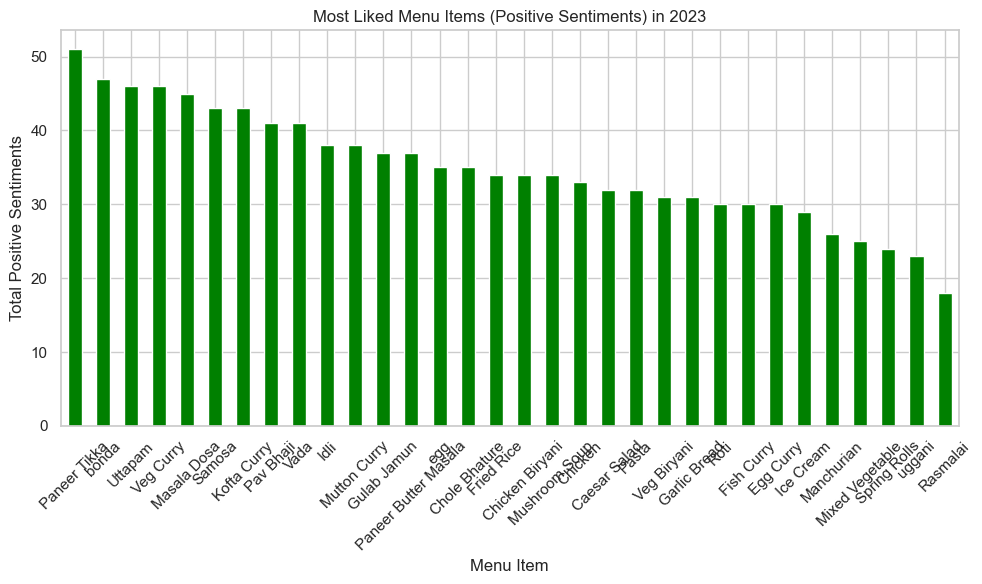

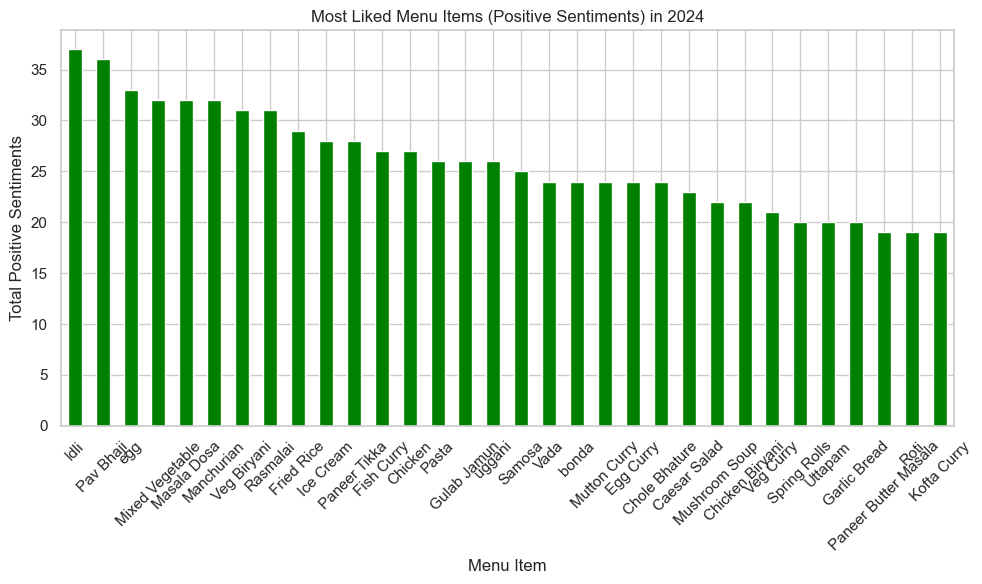

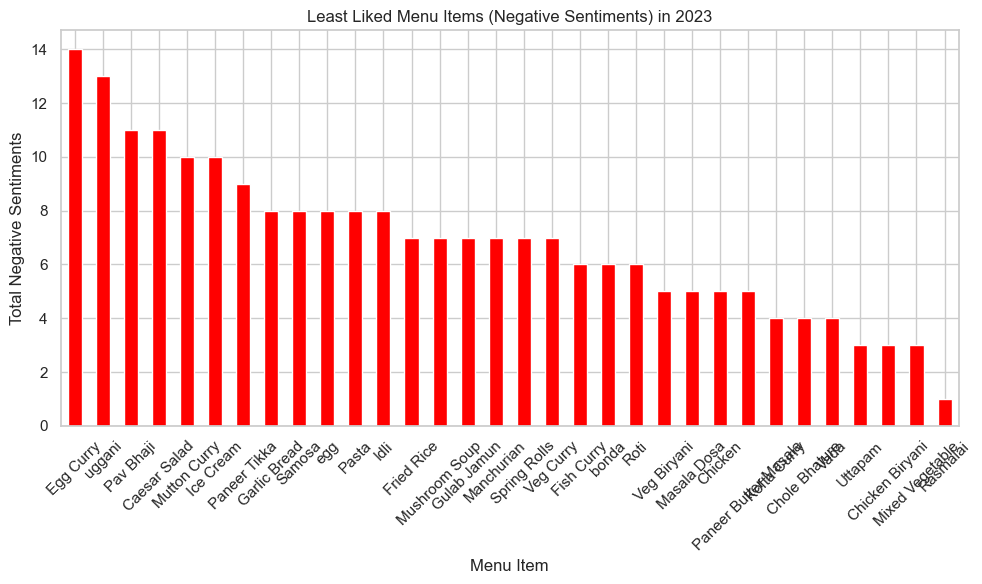

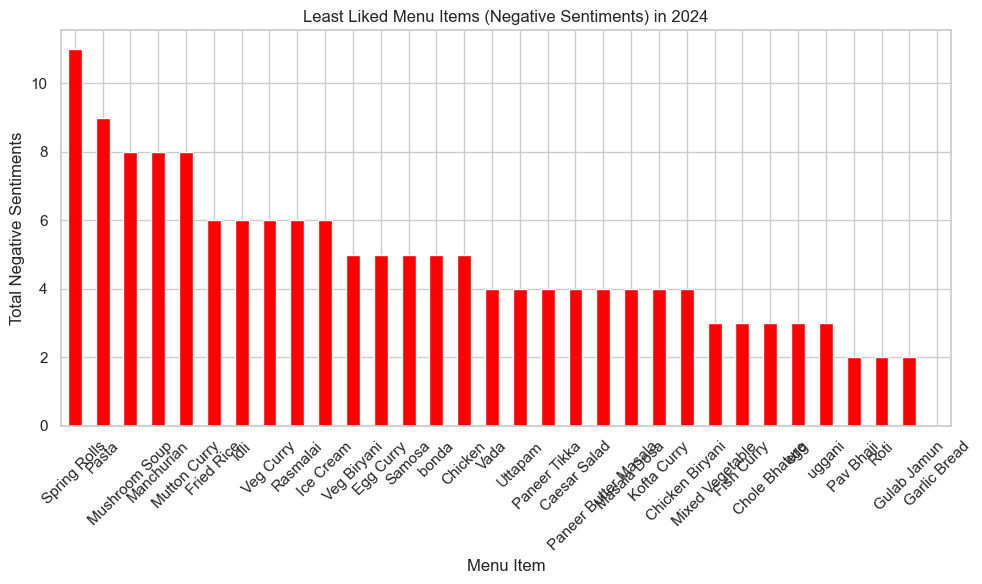

In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'monthly_menu_analysis.csv'
data = pd.read_csv(file_path)

# Set the aesthetics for the plots
sns.set(style='whitegrid')

# Convert 'year_month' to datetime format for easier handling
data['year_month'] = pd.to_datetime(data['year_month'])

# Extract year from 'year_month'
data['year'] = data['year_month'].dt.year

# Get the unique years from the dataset
years = data['year'].unique()

# Plot 1: Most liked items (positive sentiment) on a yearly basis
for year in years:
    yearly_data = data[data['year'] == year]
    
    # Group by menu item and calculate total positive sentiments for the year
    yearly_menu_sentiment = yearly_data.groupby('menu_item')['positive_count'].sum().sort_values(ascending=False)
    
    # Plot the positive sentiments for the year
    plt.figure(figsize=(10, 6))
    yearly_menu_sentiment.plot(kind='bar', color='green')
    plt.title(f'Most Liked Menu Items (Positive Sentiments) in {year}')
    plt.xlabel('Menu Item')
    plt.ylabel('Total Positive Sentiments')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot 2: Least liked items (negative sentiment) on a yearly basis
for year in years:
    yearly_data = data[data['year'] == year]
    
    # Group by menu item and calculate total negative sentiments for the year
    yearly_menu_sentiment = yearly_data.groupby('menu_item')['negative_count'].sum().sort_values(ascending=False)
    
    # Plot the negative sentiments for the year
    plt.figure(figsize=(10, 6))
    yearly_menu_sentiment.plot(kind='bar', color='red')
    plt.title(f'Least Liked Menu Items (Negative Sentiments) in {year}')
    plt.xlabel('Menu Item')
    plt.ylabel('Total Negative Sentiments')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Top 10 Most Satisfied Months:
            satisfaction_score
year_month                    
2023-04-01            0.618056
2024-05-01            0.600000
2024-03-01            0.589041
2024-08-01            0.585366
2024-07-01            0.579618
2023-03-01            0.571429
2023-09-01            0.566434
2024-02-01            0.560606
2023-02-01            0.555556
2023-11-01            0.537313

Bottom 10 Least Satisfied Months:
            satisfaction_score
year_month                    
2023-08-01            0.398810
2023-01-01            0.414013
2024-09-01            0.430108
2024-06-01            0.461039
2023-10-01            0.474820
2023-06-01            0.485075
2024-01-01            0.491379
2024-04-01            0.517483
2023-12-01            0.523179
2023-05-01            0.529851


C:\Users\Sarveswar Raj\AppData\Local\Temp\ipykernel_7396\2298720980.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_months.index.strftime('%Y-%m'), y=top_10_months['satisfaction_score'], palette='Blues_d')


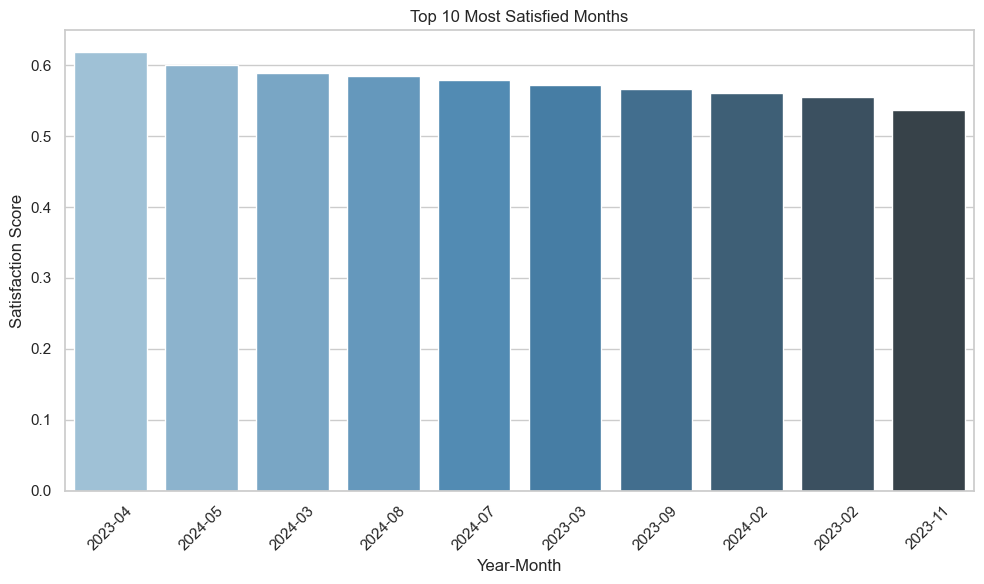

C:\Users\Sarveswar Raj\AppData\Local\Temp\ipykernel_7396\2298720980.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10_months.index.strftime('%Y-%m'), y=bottom_10_months['satisfaction_score'], palette='Reds_d')


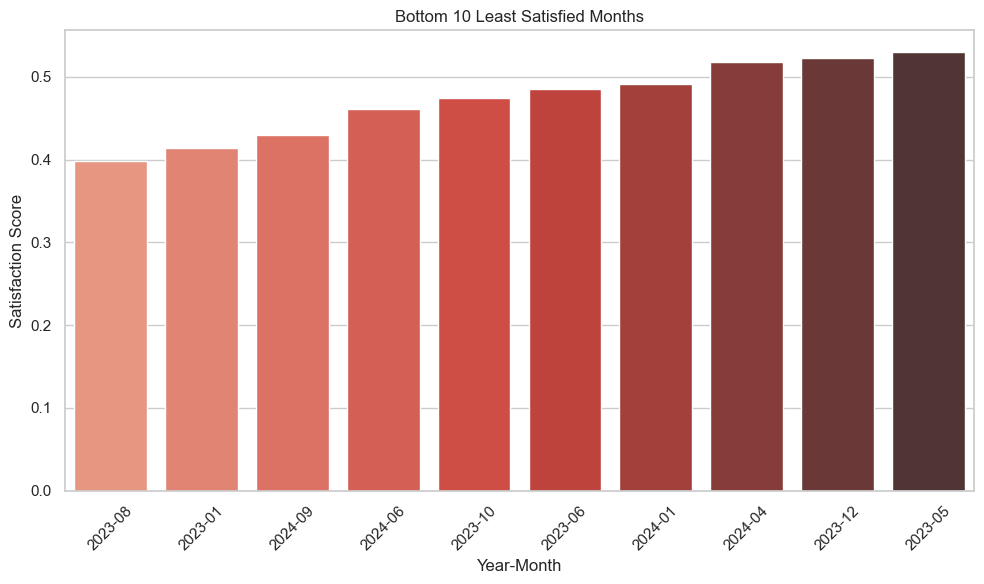

In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'monthly_menu_analysis.csv'
data = pd.read_csv(file_path)

# Convert 'year_month' to datetime format
data['year_month'] = pd.to_datetime(data['year_month'])

# Group by 'year_month' to calculate total positive, negative, and neutral counts for each month
monthly_sentiment = data.groupby('year_month')[['positive_count', 'neutral_count', 'negative_count']].sum()

# Calculate total feedback count for each month
monthly_sentiment['total_feedback'] = monthly_sentiment['positive_count'] + monthly_sentiment['neutral_count'] + monthly_sentiment['negative_count']

# Calculate satisfaction score: (positive - negative) / total feedback
monthly_sentiment['satisfaction_score'] = (monthly_sentiment['positive_count'] - monthly_sentiment['negative_count']) / monthly_sentiment['total_feedback']

# Sort months by satisfaction score (descending for top, ascending for least)
top_10_months = monthly_sentiment.sort_values(by='satisfaction_score', ascending=False).head(10)
bottom_10_months = monthly_sentiment.sort_values(by='satisfaction_score', ascending=True).head(10)

# Display top 10 months
print("Top 10 Most Satisfied Months:")
print(top_10_months[['satisfaction_score']])

# Display bottom 10 least satisfied months
print("\nBottom 10 Least Satisfied Months:")
print(bottom_10_months[['satisfaction_score']])

# Plot the results

# Plot 1: Top 10 most satisfied months
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_months.index.strftime('%Y-%m'), y=top_10_months['satisfaction_score'], palette='Blues_d')
plt.title('Top 10 Most Satisfied Months')
plt.xlabel('Year-Month')
plt.ylabel('Satisfaction Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Bottom 10 least satisfied months
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_10_months.index.strftime('%Y-%m'), y=bottom_10_months['satisfaction_score'], palette='Reds_d')
plt.title('Bottom 10 Least Satisfied Months')
plt.xlabel('Year-Month')
plt.ylabel('Satisfaction Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 10 Most Liked Menu Items:
    year_month             menu_item  satisfaction_score
598 2024-07-01           Veg Biryani                 1.0
141 2023-05-01           Masala Dosa                 1.0
143 2023-05-01         Mushroom Soup                 1.0
145 2023-05-01  Paneer Butter Masala                 1.0
493 2024-04-01          Paneer Tikka                 1.0
349 2023-11-01                   egg                 1.0
150 2023-05-01                  Roti                 1.0
496 2024-04-01              Rasmalai                 1.0
153 2023-05-01               Uttapam                 1.0
344 2023-11-01               Uttapam                 1.0

Bottom 10 Least Liked Menu Items:
    year_month      menu_item  satisfaction_score
539 2024-06-01   Caesar Salad                -1.0
223 2023-07-01         uggani                -1.0
159 2023-05-01         uggani                -1.0
351 2023-12-01   Caesar Salad                -1.0
476 2024-04-01        Chicken                -1.0
658 2024

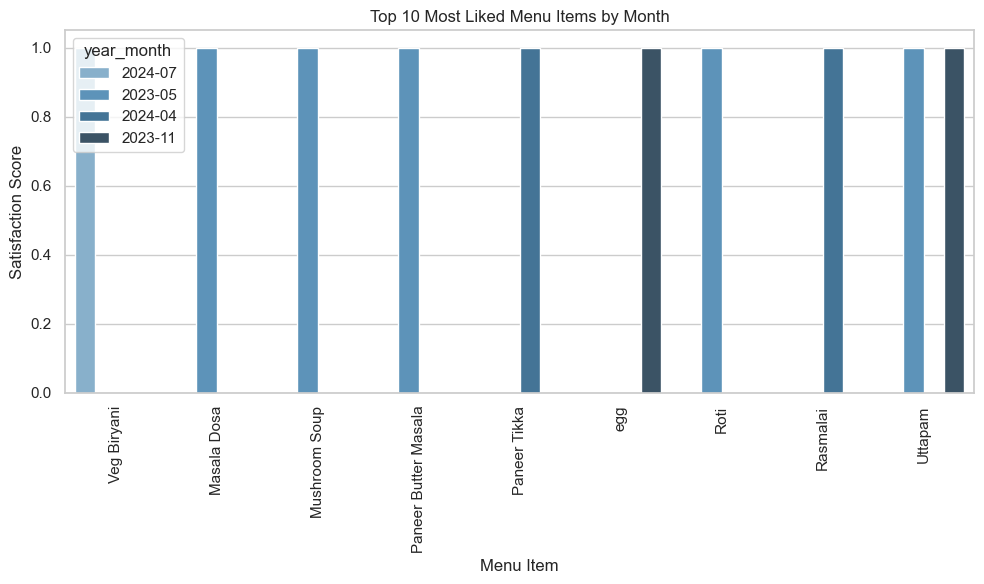

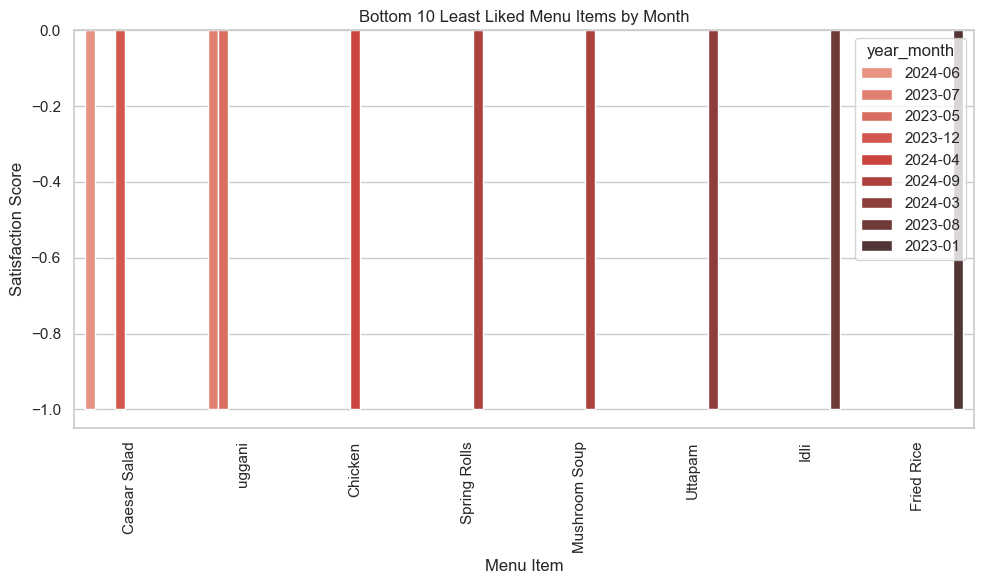

In [22]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'monthly_menu_analysis.csv'
data = pd.read_csv(file_path)

# Convert 'year_month' to datetime format
data['year_month'] = pd.to_datetime(data['year_month'])

# Group by 'year_month' and 'menu_item' to calculate total positive, negative, and total feedback for each menu item in each month
monthly_menu_sentiment = data.groupby(['year_month', 'menu_item'])[['positive_count', 'neutral_count', 'negative_count']].sum()

# Calculate total feedback count for each menu item in each month
monthly_menu_sentiment['total_feedback'] = monthly_menu_sentiment['positive_count'] + monthly_menu_sentiment['neutral_count'] + monthly_menu_sentiment['negative_count']

# Calculate satisfaction score: (positive - negative) / total feedback for each menu item in each month
monthly_menu_sentiment['satisfaction_score'] = (monthly_menu_sentiment['positive_count'] - monthly_menu_sentiment['negative_count']) / monthly_menu_sentiment['total_feedback']

# Reset index to make 'year_month' and 'menu_item' accessible columns
monthly_menu_sentiment = monthly_menu_sentiment.reset_index()

# Sort by satisfaction score to get top and bottom menu items
top_10_menu_items = monthly_menu_sentiment.sort_values(by='satisfaction_score', ascending=False).head(10)
bottom_10_menu_items = monthly_menu_sentiment.sort_values(by='satisfaction_score', ascending=True).head(10)

# Display top 10 most liked menu items
print("Top 10 Most Liked Menu Items:")
print(top_10_menu_items[['year_month', 'menu_item', 'satisfaction_score']])

# Display bottom 10 least liked menu items
print("\nBottom 10 Least Liked Menu Items:")
print(bottom_10_menu_items[['year_month', 'menu_item', 'satisfaction_score']])

# Visualization: Top 10 most liked menu items
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_menu_items['menu_item'], y=top_10_menu_items['satisfaction_score'], hue=top_10_menu_items['year_month'].dt.strftime('%Y-%m'), palette='Blues_d')
plt.title('Top 10 Most Liked Menu Items by Month')
plt.xlabel('Menu Item')
plt.ylabel('Satisfaction Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Visualization: Bottom 10 least liked menu items
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_10_menu_items['menu_item'], y=bottom_10_menu_items['satisfaction_score'], hue=bottom_10_menu_items['year_month'].dt.strftime('%Y-%m'), palette='Reds_d')
plt.title('Bottom 10 Least Liked Menu Items by Month')
plt.xlabel('Menu Item')
plt.ylabel('Satisfaction Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Top 1 Month (2023-04) Menu Sentiment:
                      positive_count  negative_count
menu_item                                           
Caesar Salad                       5               2
Chicken                            5               0
Chicken Biryani                    3               0
Chole Bhature                      3               0
Egg Curry                          2               0
Fish Curry                         3               0
Fried Rice                         2               0
Garlic Bread                       2               0
Gulab Jamun                        4               1
Ice Cream                          1               0
Idli                               0               2
Kofta Curry                        5               0
Manchurian                         2               0
Masala Dosa                        5               0
Mixed Vegetable                    2               0
Mushroom Soup                      1               0
Mutton C

<Figure size 1000x5000 with 0 Axes>

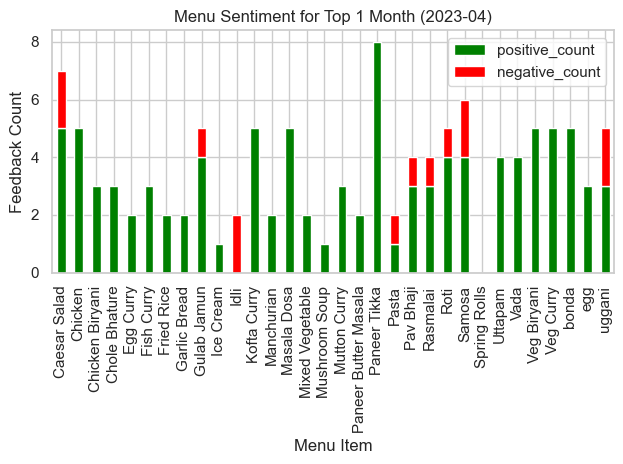

<Figure size 1000x5000 with 0 Axes>

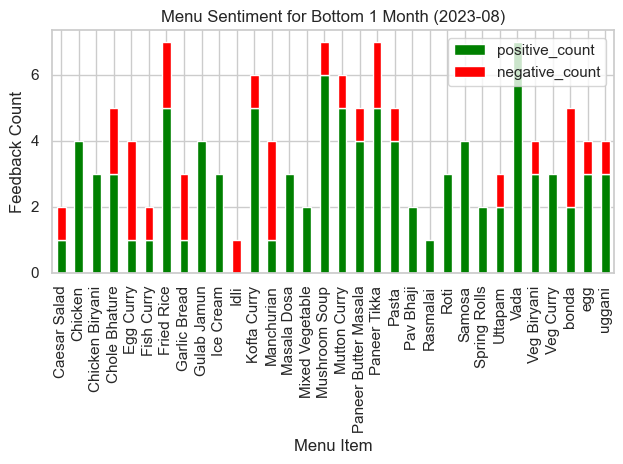

In [20]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'monthly_menu_analysis.csv'
data = pd.read_csv(file_path)

# Convert 'year_month' to datetime format
data['year_month'] = pd.to_datetime(data['year_month'])

# Group by 'year_month' to calculate total positive, negative, and neutral counts for each month
monthly_sentiment = data.groupby('year_month')[['positive_count', 'neutral_count', 'negative_count']].sum()

# Calculate total feedback count for each month
monthly_sentiment['total_feedback'] = monthly_sentiment['positive_count'] + monthly_sentiment['neutral_count'] + monthly_sentiment['negative_count']

# Calculate satisfaction score: (positive - negative) / total feedback
monthly_sentiment['satisfaction_score'] = (monthly_sentiment['positive_count'] - monthly_sentiment['negative_count']) / monthly_sentiment['total_feedback']

# Identify top 1 most satisfied month and bottom 1 least satisfied month
top_1_month = monthly_sentiment.sort_values(by='satisfaction_score', ascending=False).head(1).index[0]
bottom_1_month = monthly_sentiment.sort_values(by='satisfaction_score', ascending=True).head(1).index[0]

# Filter the data for the top 1 and bottom 1 months
top_1_month_data = data[data['year_month'] == top_1_month]
bottom_1_month_data = data[data['year_month'] == bottom_1_month]

# Group by menu item for top 1 month and sum positive, neutral, and negative feedback
top_1_menu_sentiment = top_1_month_data.groupby('menu_item')[['positive_count', 'negative_count']].sum()

# Group by menu item for bottom 1 month and sum positive, neutral, and negative feedback
bottom_1_menu_sentiment = bottom_1_month_data.groupby('menu_item')[['positive_count', 'negative_count']].sum()

# Display top 1 month menu sentiment
print(f"Top 1 Month ({top_1_month.strftime('%Y-%m')}) Menu Sentiment:")
print(top_1_menu_sentiment)

# Display bottom 1 month menu sentiment
print(f"\nBottom 1 Month ({bottom_1_month.strftime('%Y-%m')}) Menu Sentiment:")
print(bottom_1_menu_sentiment)

# Plot: Top 1 Month Menu Sentiment
plt.figure(figsize=(10, 50))
top_1_menu_sentiment.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title(f'Menu Sentiment for Top 1 Month ({top_1_month.strftime("%Y-%m")})')
plt.xlabel('Menu Item')
plt.ylabel('Feedback Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot: Bottom 1 Month Menu Sentiment
plt.figure(figsize=(10, 50))
bottom_1_menu_sentiment.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title(f'Menu Sentiment for Bottom 1 Month ({bottom_1_month.strftime("%Y-%m")})')
plt.xlabel('Menu Item')
plt.ylabel('Feedback Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


    year_month        menu_item  positive_count  negative_count  \
0      2023-01     Caesar Salad               5               2   
1      2023-01          Chicken               4               2   
2      2023-01  Chicken Biryani               1               0   
3      2023-01    Chole Bhature               1               0   
4      2023-01        Egg Curry               1               3   
..         ...              ...             ...             ...   
661    2024-09      Veg Biryani               6               1   
662    2024-09        Veg Curry               2               1   
663    2024-09            bonda               2               1   
664    2024-09              egg               1               0   
665    2024-09           uggani               2               0   

     neutral_count predicted_emotion  
0                1   Happy/Satisfied  
1                0   Happy/Satisfied  
2                0   Happy/Satisfied  
3                2       Indifferent  


<Figure size 1200x600 with 0 Axes>

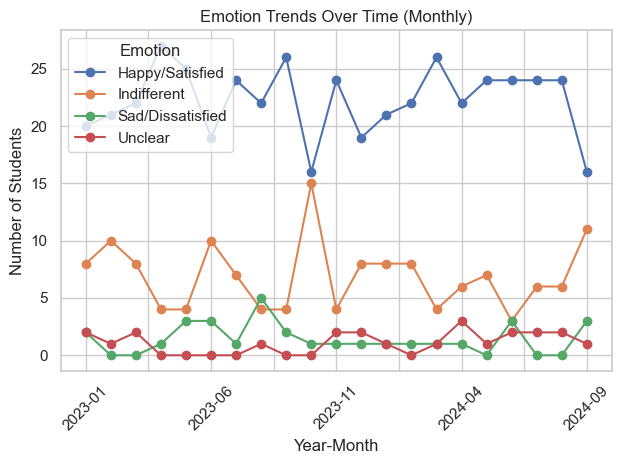

In [23]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'monthly_menu_analysis.csv'
data = pd.read_csv(file_path)

# Define a function to map sentiment to emotions
def map_sentiment_to_emotion(positive_count, negative_count, neutral_count):
    # Determine dominant sentiment
    if positive_count > negative_count and positive_count > neutral_count:
        return 'Happy/Satisfied'
    elif negative_count > positive_count and negative_count > neutral_count:
        return 'Sad/Dissatisfied'
    elif neutral_count >= positive_count and neutral_count >= negative_count:
        return 'Indifferent'
    else:
        return 'Unclear'

# Apply the function to each row of the dataset
data['predicted_emotion'] = data.apply(
    lambda row: map_sentiment_to_emotion(row['positive_count'], row['negative_count'], row['neutral_count']), axis=1)

# Display the dataset with predicted emotions
print(data[['year_month', 'menu_item', 'positive_count', 'negative_count', 'neutral_count', 'predicted_emotion']])

# Optional: Save the results to a new CSV
data[['year_month', 'menu_item', 'predicted_emotion']].to_csv('predicted_emotions.csv', index=False)

# Analyze emotions over time
emotion_trend = data.groupby('year_month')['predicted_emotion'].value_counts().unstack(fill_value=0)

# Display the emotion trend
print("\nEmotion Trend by Month:")
print(emotion_trend)

# Visualization of emotion trends over time
import matplotlib.pyplot as plt

# Plot emotion trends by month
plt.figure(figsize=(12, 6))
emotion_trend.plot(kind='line', marker='o')
plt.title('Emotion Trends Over Time (Monthly)')
plt.xlabel('Year-Month')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title="Emotion", loc='upper left')
plt.tight_layout()
plt.show()
